# CLASE 2.3: Una introducción (mayormente práctica) a los modelos de clasificación.
---
## Introducción.
Consideremos el esquema de la Fig. (3.1).

<p style="text-align: center;"><img src="figures/fig_3_1.png" width="350"></p>
<p style="text-align: center;">Fig. (3.1): Un esquema general de como un sistema genera respuestas a partir de cierta información de entrada</p>

Tal esquema es una representación (quizás muy) genérica de un problema muy común en todo ámbito de las ciencias y, particularmente, de la ingeniería: Disponemos de un *sistema* que produce una serie de **respuestas de interés** a partir de estímulos descritos por una determinada **información de entrada**. Desde luego, la palabra *sistema* se utiliza aquí como un sustantivo colectivo de gran envergadura, puesto que, en realidad, tal sistema podría ser un determinado proceso, fenómeno o experimento de interés. Sea cual fuere el caso, en general, siempre nos vemos enfrentados a problemas que pueden ser representados por el esquema de la Fig. (3.1).

Si aún no estamos convencidos, consideremos los siguientes ejemplos:

**Ejemplo 3.1 - Ensayos de resistencia triaxiales:** En la elaboración de estudios de resistencia de un material rocoso, es común que se realicen ensayos triaxiales destructivos sobre probetas o testigos constituidos por dicho material, en los cuales, mediante la acción de equipamiento especializado, sometemos a estas probetas a una carga axial o vertical, al mismo tiempo que el contenedor de la probeta se llena de un fluido que permite simular la acción de un confinamiento desde todas las direcciones hacia ella. El objetivo de estos ensayos es, dada una presión de confinamiento que es variable, determinar la carga axial que provoca la rotura de la probeta.

Naturalmente, estamos interesados en testear tantas probetas como sea posible, puesto que el medio materal desde el cual estas probetas son extraídas suele ser un macizo rocoso interesectado por estructuras geológicas que constituyen planos de debilidad que alteran enormemente sus propiedades de resistencia. Por lo tanto, en términos prácticos, los ensayos triaxiales resultan en una serie de pares del tipo $(\sigma_{1},\sigma_{3})_{i}$, que se corresponden, respectivamente, con la carga axial a la cual se consiguió la rotura de la $i$-ésima probeta ($\sigma_{1}$) y la presión de confinamiento a la cual estuvo sometida ($\sigma_{3}$). Esta nomenclatura no es casual, ya que, en mecánica de sólidos, es común denotar las cargas por unidad de área (presiones o esfuerzos) con la letra griega $\sigma$. Los números $1$ y $3$ se usan para referenciar que estamos interesados en los **esfuerzos principales** que actúan sobre la probeta de roca, siendo así $\sigma_{1}$ el esfuerzo principal mayor, y $\sigma_{3}$ el menor.

Dado lo anterior, es natural preguntarse si existe una relación entre ambos tipos de esfuerzos para el material que estamos ensayando. De hecho, esta es una de las cuestiones fundamentales en la ingeniería geomecánica, que es la especialidad que se encarga de asegurar la estabilidad, a nivel mecánico, de cualquier labor minera. Naturalmente, no existe un único criterio que permita formular una relación entre los esfuerzos $\sigma_{1}$ y $\sigma_{3}$, pero uno de los más usados es el llamado **criterio de Hoek & Brown**, y que establece que

$$\sigma_{1} = \sigma_{3} +\sigma_{\mathrm{ci} } \sqrt{m_{i}\frac{\sigma_{3} }{\sigma_{\mathrm{ci} } } +1}$$
<p style="text-align: right;">$(3.1)$</p>

Donde $\sigma_{\mathrm{ci} }$ y $m_{i}$ son parámetros que dependen del tipo de material ensayado.

Conforme el principio de minimización del riesgo empírico, el modelo como tal parte de una hipótesis $f$, de manera tal que deseamos obtener una estimación de la carga $\sigma_{1}$, que denominamos como $\hat{\sigma}_{1}$, tal que $\hat{\sigma}_{1}=f(\sigma_{3} | \sigma_{\mathrm{ci}},m_{i})$. Sin embargo, debido a que los resultados de una serie de ensayos triaxiales son simplemente pares de valores $(\sigma_{1},\sigma_{3})$ para cada probeta, la fórmula (3.1) no es muy práctica para representar de forma directa nuestros resultados. Sin embargo, al aplicar algo de álgebra, podemos reordenar los términos de (3.1), obteniendo

$$\begin{array}{lll}\sigma_{1} &=&\sigma_{3} +\sigma_{\mathrm{ci} } \sqrt{m_{i}\frac{\sigma_{3} }{\sigma_{\mathrm{ci} } } +1} \\ \sigma_{1} -\sigma_{3} &=&\displaystyle \sigma_{\mathrm{ci} } \sqrt{m_{i}\frac{\sigma_{3} }{\sigma_{\mathrm{ci} } } +1} \\ \left( \sigma_{1} -\sigma_{3} \right)^{2}  &=&\displaystyle \sigma^{2}_{\mathrm{ci} } \left( m_{i}\frac{\sigma_{3} }{\sigma_{\mathrm{ci} } } +1\right)  \\ \underbrace{\left( \sigma_{1} -\sigma_{3} \right)^{2}  }_{y} &=&\displaystyle \underbrace{\sigma_{\mathrm{ci} } m_{i}}_{a} \underbrace{\sigma_{3} }_{x} +\underbrace{\sigma^{2}_{\mathrm{ci} } }_{b} \end{array} $$
<p style="text-align: right;">$(3.2)$</p>

De este modo, con los pares $(\sigma_{1},\sigma_{3})$ que hemos obtenido de nuestros ensayos, podemos construir un modelo lineal del tipo $y=ax+b$, donde $y=(\sigma_{1}-\sigma_{3})^{2}$ y $x=\sigma_{3}$. El valor de $y$ no es un resultado particular de los ensayos, pero puede calcularse rápidamente. De este modo, el modelo resultante nos permitirá obtener los valores de $\sigma_{\mathrm{ci} }$ y $m_{i}$, puesto que $a=\sigma_{\mathrm{ci} }m_{i}$ y $b=\sigma_{\mathrm{ci} }^{2}$.

Este ejemplo es una buena aplicación del esquema de la Fig. (3.1). El **sistema** de interés es un experimento en el cual ensayamos la resistencia de un material rocoso, donde la **información de entrada** es, evidentemente, el confinamiento $\sigma_{3}$ al cual sometemos las probetas conformadas por ese material. La **respuesta** es, por supuesto, la carga axial $\sigma_{1}$ a la cual se consigue la rotura de la probeta.

Este es un **problema de regresión**, ya que la respuesta del sistema de interés es una variable continua y que puede tomar infinitos valores en un intervalo determinado de presiones mínima y máxima de rotura. La palabra *infinito* no quiere decir que realizamos *infinitos* ensayos, sino que la variable de respuesta *podría* tomar *cualquier* valor en un rango de valores determinado (que muchas veces también es desconocido). En términos técnicos, los resultados obtenidos para $\sigma_{1}$ y $\sigma_{3}$ durante nuestros ensayos *pertenecen* a un universo infinito de posibles valores para cada variable. Por lo tanto, resulta ideal *imaginar* que $\sigma_{1}$ y $\sigma_{3}$ son simplemente *muestras* o *realizaciones* de variables aleatorias continuas desconocidas. ◼︎

**Ejemplo 3.2 – Estallidos de roca:** Uno de los aspectos más notables del desarrollo de minas subterráneas explotadas mediante métodos de hundimiento masivos es la profundización de labores en un entorno con grandes magnitudes de esfuerzos. En minas subterráneas muy profundas, tales esfuerzos representan cargas increíblemente grandes de carácter acumulativo sobre la infraestructura propia de un sector productivo y, al liberar tales tensiones, el macizo rocoso puede, literalmente, explotar. Estos **estallidos de roca** son proyecciones de material rocoso que son producto de estos altos esfuerzos y se caracterizan por generar detenciones importantes en la operación. Son, a todas luces, un riesgo para las personas.

En términos físicos, los estallidos de roca son sismos inducidos por la minería que producen daño en la infraestructura productiva. La sismicidad inducida por la minería es un aspecto importante en labores subterráneas, porque a partir de su estudio es posible entender cual es el riesgo inherente a la propia operación en relación a la ocurrencia de estallidos de roca. Por tanto, es común que las grandes operaciones subterráneas cuenten con una completa red de geófonos que permiten cuantificar, con errores de localización dependientes de la cantidad de equipos, estos sismos.

En una mina subterránea muy grande, emplazada en un ambiente de altos esfuerzos, es común que ocurran más de 400.000 microsismos al año. Los eventos sísmicos potencialmente peligrosos suelen clasificarse en términos de la energía que éstos irradian por medio de algún modelo geofísico adecuado, siendo común aislar y estudiar aquellos cuya energía irradiada supere el umbral de 1 MJ (en general, eventos sobre 0.7 $M_{w}$, en la escala de magnitud de momento). Pero hay un problema: De estos 400.000 eventos, sólo unos 1.000 son potencialmente dañinos. Es decir, el 0.25% del total.

Y ni hablar de los estallidos de rocas... En promedio, ocurre uno al año... ¡Uno de cada 400.000 eventos!

Uno de los desafíos más importantes de la ingeniería de minas (puntualmente, de la ingeniería geomecánica) corresponde a la predicción de los estallidos de roca, aunque dado lo intratable que resulta predecir algo tan infrecuente, este problema suele limitarse a la predicción de eventos potencialmente peligrosos. Para resolver este problema, normalmente consideraríamos variables de entrada tales como la velocidad de hundimiento, la magnitud de los esfuerzos principales en el entorno de un sector productivo pre-minería, cómo hemos acondicionado el macizo rocoso, el tipo de roca, entre otros muchos aspectos propios de la actividad minera. Si tenemos $m$ observaciones para $n$ variables, todos estos atributos pueden reunirse en una matriz $\mathbf{X}\in \mathbb{R}^{m\times n}$ que aglutinará esta información en el contexto de un modelo de aprendizaje supervisado, donde $m$ es el número de observaciones y $n$ el número de variables independientes. Sea $E_{i}$ la energía irradiada en joules por el $i$-ésimo evento sísmico observado. Si definimos $y_{i}$ como

$$y_{i}=\begin{cases}1&;\  \mathrm{si} \  E_{i}\geq 10^{6}\\ 0&;\  \mathrm{si} \  E_{i}<10^{6}\end{cases} $$
<p style="text-align: right;">$(3.3)$</p>

Entonces $y_{i}$ es una **variable binaria** que permite describir la ocurrencia (o no) de eventos sísmicos potencialmente peligrosos.

El problema anterior no es de regresión, porque es evidente que la variable $\mathbf{y}=(y_{1},...,y_{m})\in \mathbb{R}^{m}$ no es continua. Se trata pues de un **problema de clasificación**, ya que estamos interesados en **etiquetar** a un evento sísmico como potencialmente riesgoso ($y_{i}=1$) o no. De esta manera, nuevamente remitiéndonos a la Fig (3.1), el **sistema** de interés es una operación minera subterránea, donde la **información de entrada** está referida a las condiciones y variables operaciones qué permiten explicar cómo (y, posiblemente, cuándo) se realizan todas las actividades mineras que permiten garantizar la producción, las cuales, como comentamos previamente, se aglutinan en una matriz $\mathbf{X}\in \mathbb{R}^{m\times n}$. La respuesta es, naturalmente, la variable binaria $y_{i}$, con $i=1,...,m$. De esta forma, la hipótesis $f$ asociada a este problema vendría a ser $\hat{y}_{i}=f(\mathbf{X})$.

Hay otros aspectos de interés en este problema particular que no discutiremos aquí (por ejemplo ¿Qué representan las $i$? ¿Puntos en el espacio? Y si es así ¿Cuáles puntos?). Lo que sí es interesante, es el tipo de variable a predecir, que es **categórica**. La naturaleza de este problema es interesante por sí misma, puesto que, además de simplemente etiquetar eventos de forma binaria, es igualmente válido preguntarnos por la **probabilidad** de que ocurra un evento potencialmente peligroso. O bien, formular una hipótesis $g$ tal que $P(y_{i}=1)=g(\mathbf{X})$.

Más adelante, veremos que ambas ópticas son esencialmente equivalentes, y dependerán esencialmente del valor de probabilidad que *discrimina* los valores de las etiquetas correspondientes (en el contexto de este ejemplo, un evento potencialmente peligroso podría ser aquel cuya probabilidad de que su energía irradiada sea mayor a $10^{6}$ J, sea mayor que un 50%, pero un *stakeholder* más conservador querrá reducir ese margen a 30% o incluso menos).

Este es el tipo de problemas de los que nos ocuparemos en esta sección. ◼︎

## El problema.
Anteriormente establecimos que hay varios problemas propios que se derivan de los algoritmos de aprendizaje supervisado, siendo los más relevantes los problemas de **regresión** y de **clasificación**. Es común que los problemas de regresión suelan abordarse en los cursos más elementales de las carreras de ingeniería y ciencias, debido a que muchos estudios empíricos implican la construcción de ciertos tipos de modelos que intentan predecir variables continuas con funciones de densidad desconocida, razón por la cual el problema de regresión será visto con posterioridad. Sin embargo, este no es el caso para los modelos de clasificación, los cuales, en la literatura básica de estadística y ciencias, suelen ser mucho menos populares (en mi caso, ni siquiera los ví cuando estaba en la universidad).

En esta sección nos dedicaremos a estudiar únicamente problemas relativos a la construcción de modelos de clasificación. Esto es, modelos que intentan predecir variables que son categóricas, típicamente con una cantidad muy pequeña de valores posibles, y que solemos denominar como **etiquetas**, **clases** o **categorías**.

Como comentamos previamente, un **problema de clasificación** es uno tal donde deseamos construir una función $f$ (denominada **hipótesis**), tal que, para un conjunto de datos de entrenamiento $\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right)  :\mathbf{X} =\left\{ x_{ij}\right\}  \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}$, se tenga que $\hat{y}_{i}\approx f(\mathbf{x}_{i},\mathbf{\theta})$ para toda instancia $i=1,...,m$, donde $\hat{y}_{i}$ es la estimación que realiza $f$ a partir del vector $\mathbf{x}_{i}=(x_{i1},...,x_{in})^{\top}$ y $\mathbf{\theta}$ es un vector de parámetros que debemos determinar, y son propios del modelo en cuestión. En este marco de referencia, la matriz $\mathbf{X}$ que aglutina los **datos de entrada** tiene $m$ filas y $n$ columnas. Las filas harán referencia al número total de **instancias** u **observaciones** asociadas a un determinado fenómeno, sistema, proceso o experimento de interés, mientras que las columnas harán referencia a los **atributos** o **variables** del problema de interés.

Debido a que la variable de salida $\mathbf{y}\in \mathbb{R}^{m}$ sólo puede tomar un número finito de valores, a la hora de construir un **modelo de clasificación**, *predecir* el valor de $\mathbf{y}$ puede derivar en dos *sub-problemas*:

- Estimar exactamente el valor de $\mathbf{y}$. De este modo, si $\mathbf{y}=\left\{ c_{1},...,c_{k}\right\}$, donde $c_{s}$ es uno de los $k$ posibles valores que puede tomar $\mathbf{y}$ ($1\leq s\leq k$), podríamos desear construir un *predictor* $f$ tal que $\hat{\mathbf{y}}=f(\mathbf{X})$.
- Estimar $P(y_{i}=c_{s}|\mathbf{x}_{i})$ o, en términos menos técnicos, la **probabilidad** de que $y_{i}$ tome el valor $c_{s}$, dado el valor de la instancia $\mathbf{x}_{i}$. En este caso, se tiene una hipótesis $g$ tal que $P(y_{i}=c_{s}|\mathbf{x}_{i})=g(\mathbf{x}_{i})$.

Cualquiera sea el caso, el nivel de complejidad del problema es función del número $k$ de clases o categorías que toma la respuesta $\mathbf{y}$. Cuando $k=2$, el problema es llamado **binario**, mientras que, si $k>2$, el problema será llamado **multicategórico** o **multinomial**.

## Función de costo.

### El problema de usar funciones de costo aptas para problemas de regresión.
Uno de los aspectos más diferenciadores de los modelos de clasificación guarda relación con el uso de determinadas funciones de costo. Para el caso de los modelos de regresión, la selección de estas funciones es un tanto más evidente, dada la popularidad de los mismos (es muy común que muchas carreras científicas y de ingeniería contemplen, en su malla curricular, la enseñanza del modelo de regresión lineal, el cual, desde la óptica del aprendizaje supervisado, suele utilizar como función de costo al **error cuadrático medio**). Tal función es útil en este tipo de problemas, porque si una variable de interés $\mathbf{y}=(y_{1},...,y_{m})\in \mathbb{R}^{m}$ es continua, siempre podremos tener una idea intuitiva de *qué tan buena* es una predicción o estimación $\hat{y}_{i}$ de $y_{i}$ ($1\leq i\leq m$) al calcular la **diferencia absoluta** $y_{i}-\hat{y}_{i}$, porque, entre mayor sea la magnitud de esta diferencia, mayor será el error, y más se penalizarán estos valores al entrenar un modelo. De hecho, para un total de $m$ instancias de entrenamiento, la fórmula del error cuadrático medio, a saber

$$\mathrm{MSE}=\frac{1}{m} \sum_{i=1}^{m}(y_{i}-\hat{y}_{i})^{2}$$
<p style="text-align: right;">$(3.4)$</p>

Contiene esta *distancia* $(y_{i}-\hat{y}_{i})$, aunque elevada al cuadrado, a fin de considerar únicamente sus magnitudes, independiente de si el error cometido por el modelo es por *exceso* o por *defecto*.

El problema de usar una función de costo como ésta cuando $\mathbf{y}$ es una variable categórica, es que las correspondientes categorías no necesariamente tendrán un orden lógico. Por ejemplo, podríamos estar interesados en construir un sistema que discrimine distintos tipos de minerales con base en un modelo de clasificación alimentado por miles de imágenes provenientes de sondajes realizados en diversas campañas en un yacimiento minero. De esta manera, podríamos tener una variable de respuesta parecida a

$$y_{i}=\left\{ \mathrm{calcopirita} ,\mathrm{pirita} ,\mathrm{enargita} ,\mathrm{covelina} ,\mathrm{galena} \right\}  $$
<p style="text-align: right;">$(3.5)$</p>

para $1\leq i\leq m$. Dada la naturaleza de esta variable, no tiene sentido pensar en *distancias* (o diferencias) entre valores estimados y reales, porque claro... ¿es lógico restar $\hat{y}_{i}=\mathrm{enargita}$ con $y_{i}=\mathrm{covelina}$? Es posible asumir que cada categoría pueda ser representada por un número natural, digamos

$$y_{i}=\begin{cases}0&;\  \mathrm{si} \  y_{i}=\mathrm{calcopirita} \\ 1&;\  \mathrm{si} \  y_{i}=\mathrm{covelina} \\ 2&;\  \mathrm{si} \  y_{i}=\mathrm{enargita} \\ 3&;\  \mathrm{si} \  y_{i}=\mathrm{pirita} \\ 4&;\  \mathrm{si} \  y_{i}=\mathrm{galena} \end{cases} $$
<p style="text-align: right;">$(3.6)$</p>

Pero aún así calcular diferencias entre valores estimados y reales no tiene sentido, porque las relaciones de orden entre estas categorías *transformadas* no existen en la realidad. No podemos establecer que $\mathrm{galena} >\mathrm{pirita}$, por lo que la relación $4 >3$, que es cierta en términos numéricos, carece de significado en el contexto de nuestro problema.

### Función de entropía cruzada.
**Ejemplo 3.3 – El conjunto de datos <font color='forestgreen'>MOONS</font>:** La discusión anterior motiva la necesidad de formular una función de costo adecuada para abordar un problema de clasificación. Para ello, vamos a considerar un problema binario derivado de un conjunto de datos *de juguete* (o *toyset*) muy conocido en la ciencia de datos, llamado **<font color='forestgreen'>MOONS</font>**. Dicho conjunto de datos está definido en un dominio arbitrario $U$ de $\mathbb{R}^{2}$, y está compuesto por dos subconjuntos de puntos con formas (aproximadamente) de medialuna que se enfrentan entre sí, siendo $\mathcal{M}_{1}$ la medialuna superior y $\mathcal{M}_{2}$ la inferior (de tal forma que $U=\mathcal{M}_{1}\cup \mathcal{M}_{2}$). Cada medialuna se colorea de forma distinta, de manera tal que, para todo $(x_{1},x_{2})\in U$, definimos

$$y=\begin{cases}1&;\  \mathrm{si} \  \left( x_{1},x_{2}\right)  \in \mathcal{M}_{1} \\ 0&;\  \mathrm{si} \  \left( x_{1},x_{2}\right)  \in \mathcal{M}_{2} \end{cases} $$
<p style="text-align: right;">$(3.7)$</p>

Este *toyset* es tan famoso que, por supuesto, es posible construirlo haciendo uso de la librería **<font color='mediumorchid'>Scikit-Learn</font>**. Para ello, haremos uso de la función `make_moons()`, cuya dependencia es el módulo `sklearn.datasets`. Haremos uso también de **<font color='mediumorchid'>Numpy</font>** para manipular algunos arreglos y **<font color='mediumorchid'>Matplotlib</font>** para visualizar este conjunto de datos:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import make_moons

In [3]:
plt.rcParams["figure.dpi"] = 110
sns.set()
plt.style.use("bmh")

In [4]:
%matplotlib widget

In [5]:
# Construimos el conjunto de datos.
X, y = make_moons(n_samples=2000, noise=0.1, random_state=42)

La función `make_moons()` acepta varios argumentos, entre los cuales consideramos:

- `n_samples`: Total de instancias del conjunto de datos resultante (en nuestra implementación, un total de `2000`). Dicho conjunto es siempre bidimensional, por lo que la geometría del arreglo resultante (que llamamos `X`) que constituye los atributos de entrada será siempre `(n_samples, 2)`. La mitad de los valores tendrá una etiqueta `y` igual a `1`, mientras que la otra mitad tendrá una etiqueta `y` igual a `0`.
- `noise`: Parámetro flotante que especifica la desviación estándar de los puntos `X`. Mientras mayor sea este valor, más dificil será diferenciar a cuál medialuna pertenece cada punto, porque habrá mayor dispersión. En nuestro ejemplo, `noise=0.1`, lo que implica una dispersión relativamente baja, lo que permite diferenciar inmediatamente a qué clase pertenece cada punto en un gráfico.
- `random_state`: Parámetro que permite fijar la semilla aleatoria que genera estos puntos. Como suele ocurrir en **<font color='mediumorchid'>Scikit-Learn</font>**, este parámetro permite garantizar la **reproducibilidad** de los resultados obtenidos a partir de la construcción de este conjunto de datos.

Si graficamos estos puntos, podremos identificar al instantes ambas medialunas:

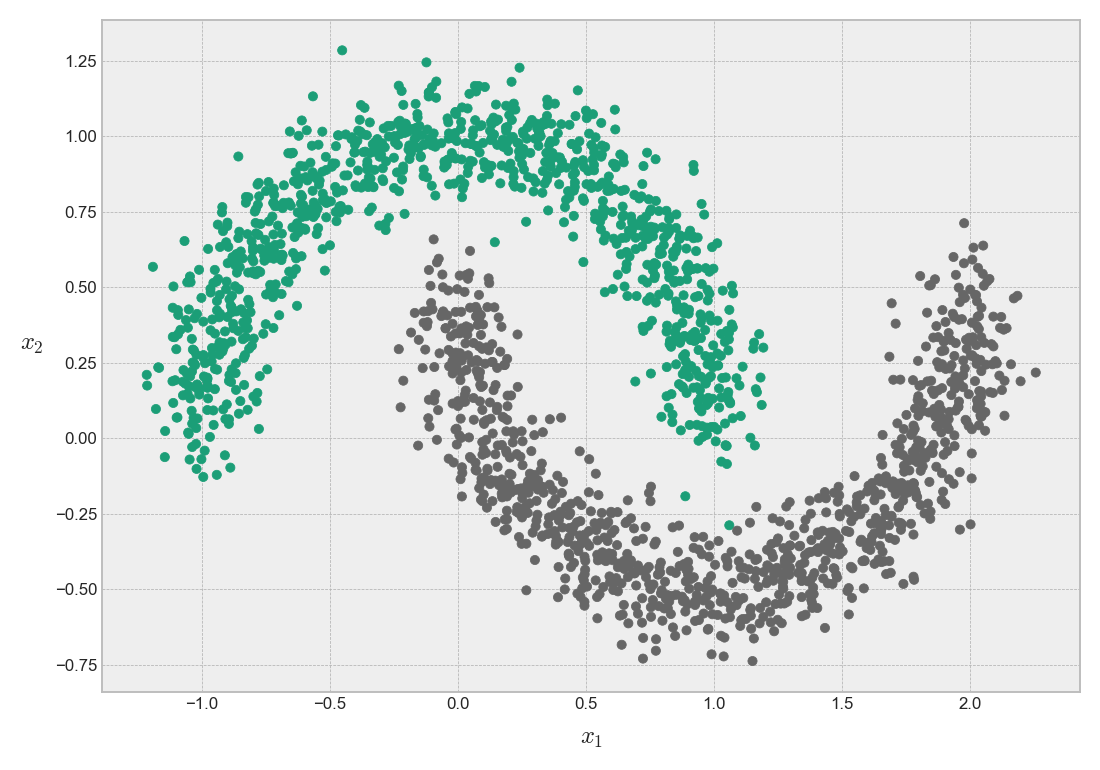

In [6]:
# Gráfico de nuestro conjunto de datos.
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X[:, 0], X[:, 1], c=y, marker="o", cmap="Dark2")
ax.set_xlabel(r"$x_{1}$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$x_{2}$", fontsize=16, labelpad=15, rotation=0)
plt.tight_layout();

En el conjunto de datos anterior, los puntos $(x_{1},x_{2})$ pertenecientes a la medialuna superior ($\mathcal{M}_{1}$) son tales que $y_{i}=1$, mientras que aquellos que pertenecen a la medialuna inferior ($\mathcal{M}_{2}$) son tales que $y_{i}=0$ ($i=1,2,...,2000$). De esta manera, el conjunto de datos que hemos construido está representado por un arreglo `X` de geometría `(2000, 2)` que contiene un total de `2000` instancias y `2` atributos. Por lo tanto, matemáticamente, estos datos pueden aglutinarse en una matriz, digamos $\mathbf{X} =\left\{ x_{ij}\right\}  \in \mathbb{R}^{2000\times 2}$. Correspondientemente, las etiquetas que clasifican a cada una de las 2000 instancias $\mathbf{x}_{i}=(x_{1},x_{2})_{i}\in \mathbb{R}^{2}$ ($1\leq i\leq 2000$) como pertenecientes a cualquiera de las dos medialunas se agrupan en un arreglo unidimensional `y` de geometría `(2000,)`, y que matemáticamente puede expresarse por medio de un vector $\mathbf{y}\in \mathbb{R}^{2000}$.

Este conjunto de datos representa un problema de clasificación muy común: Queremos construir un modelo que permita discriminar, con el menor error posible, a aquellos puntos que pertenecen a cada medialuna.

Para intentar solucionar este problema, optaremos por un modelo sencillo que intente separar ambas clases (las medialunas...) haciendo uso de una recta. Naturalmente, esto inducirá un cierto nivel de error, porque es imposible que una recta separe efectivamente ambos subconjuntos de interés. Sin embargo, aceptaremos este hecho e intentaremos calcular ese error haciendo uso de una función de costo adecuada. Más adelante aprenderemos que este tipo de conjuntos son llamados **linealmente no separables**.

Si el modelo separará (o, al menos, intentará hacerlo) a ambos subconjuntos, $\mathcal{M}_{1}$ y $\mathcal{M}_{2}$, por medio de una recta, podemos establecer que ésta tendrá como ecuación a una expresión del tipo $\theta_{1}x_{1}+ \theta_{2}x_{2}+b=0$, donde $\theta_{1},\theta_{2}$ y $b$ son **parámetros** que debemos determinar. Notemos que, conforme el principio de minimización de riesgo empírico, es claro que la ecuación de esta recta tiene la forma de una hipótesis $f$ tal que

$$f\left( x_{1},x_{2}\right)  =\theta_{1} x_{1}+\theta_{2} x_{2}+b$$
<p style="text-align: right;">$(3.8)$</p>

De esta manera, si $f(x_{1},x_{2})\geq 0$, entonces la estimación $\hat{y}$ será igual a 1, mientras que, si $f(x_{1},x_{2})<0$, entonces $\hat{y}$ será igual a 0. Esta capacidad de $f$ para poder **discriminar** las clases estimadas por un modelo de clasificación dota a nuestra hipótesis de un poder de decisión importante en un contexto práctico, razón por la cual solemos llamar igualmente a $f$, en un contexto como éste, como **función de decisión**. Esta es una nomenclatura muy usada por varios paquetes computacionales, incluyendo a **<font color='mediumorchid'>Scikit-Learn</font>**.

Consideremos la función $\phi:\mathbb{R}\longrightarrow (0,1)$, definida como

$$\phi \left( u\right)  =\frac{1}{1+\exp \left( -u\right)  } $$
<p style="text-align: right;">$(3.9)$</p>

Dicha función es conocida como **función logística**, y tiene la particularidad de que su dominio es todo $\mathbb{R}$, pero su recorrido es el conjunto $(0,1)$, siendo simétrica con respecto a la recta $y=0$. De esta forma, la función $\phi$ puede interpretarse como una **función de probabilidad**, la que puede usarse para estimar, por consiguiente, las probabilidades $P(y_{i}=1)$ o $P(y_{i}=0)$, para $1\leq i\leq 2000$.

Utilizaremos la librería **<font color='mediumorchid'>Numpy</font>** para generar un gráfico sencillo de la función logística como sigue:

In [7]:
# Definimos la función logística.
def logistic(u):
    return 1 / (1 + np.exp(-u))

In [8]:
# Generamos un arreglo en el intervalo (-8, 8) y calculamos los valores correspondientes de la función logística.
u = np.linspace(start=-8, stop=8, num=100)
phi = logistic(u)

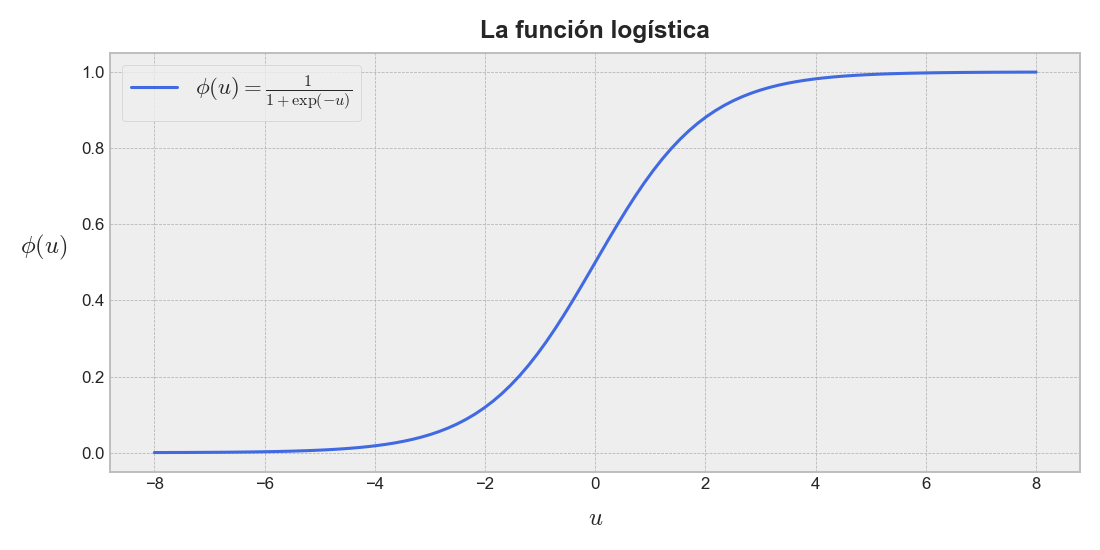

In [9]:
# Construimos el gráfico de la función logística.
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(u, phi, color="royalblue", label=r"$\phi(u)  =\frac{1}{1+\exp(-u)}$")
ax.set_xlabel(r"$u$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$\phi(u)$", fontsize=16, labelpad=25, rotation=0)
ax.legend(fontsize=15, frameon=True)
ax.set_title("La función logística", fontsize=16, fontweight="bold", pad=10)
plt.tight_layout();

Podemos observar que el gráfico de $\phi$ tiene una característica forma de "S", conocida en matemáticas (y en un montón de paquetes computacionales) como **sigmoide**.

Notemos que la función de decisión $f$, al aplicarse sobre las 2000 instancias que constituyen la matriz $\mathbf{X}$, retorna como resultado un arreglo $\mathbf{u}=(u_{1},...,u_{2000})\in \mathbb{R}^{2000}$, el cual, naturalmente, describe un recta en el dominio en el que están definidas las medialunas $\mathcal{M}_{1}$ y $\mathcal{M}_{2}$. Dicho arreglo puede usarse como entrada para $\phi$ a fin de obtener como resultado las probabilidades de pertenencia de cada instancia $\mathbf{x}_{i}$ a una determinada clase o medialuna, $\mathcal{M}_{1}$ o $\mathcal{M}_{2}$. De este modo, cada elemento de $\mathbf{u}$ puede describirse como

$$u_{i}=\theta_{1} x_{i1}+\theta_{2} x_{i2}+b$$
<p style="text-align: right;">$(3.10)$</p>

para $1\leq i\leq 2000$. Notemos que podemos reescribir (3.10) de manera compacta haciendo uso de una **multiplicación matricial**, de manera tal que

$$\mathbf{u} =\mathbf{\theta }^{\top } \mathbf{X} +b$$
<p style="text-align: right;">$(3.11)$</p>

donde $\mathbf{\theta }=(\theta_{1},\theta_{2})\in \mathbb{R}^{2}$ es un vector que agrupa a los parámetros que debemos determinar. Si agregamos una columna únicamente compuesta por 1s a la izquierda de $\mathbf{X}$ y ponemos $\theta_{0}=b$, de tal forma que ahora $\mathbf{\theta}=(\theta_{0},\theta_{1},\theta_{2})\in \mathbb{R}^{3}$, podemos compactar aún más la expresión anterior, con lo cual el vector $\mathbf{u}$ puede simplemente escribirse como

$$\mathbf{u} =\mathbf{\theta }^{\top } \mathbf{X}$$
<p style="text-align: right;">$(3.12)$</p>

Las ecuaciones (3.11) y (3.12) son de gran importancia, porque son independientes de las dimensiones de $\mathbf{\theta}$ y $\mathbf{X}$ y, por tanto, pueden escalarse sin ningún problema para cualquier tipo de problema con las mismas características. De este modo, la probabilidad de pertenencia de cada punto a una determinada clase puede expresarse por medio de la ecuación

$$P\left( y_{i}=1\  |\  \mathbf{\theta } \right)  =\frac{1}{1+\exp \left( -\mathbf{\theta }^{\top } \mathbf{X} \right)  } \  ;\  i=1,...,2000$$
<p style="text-align: right;">$(3.13)$</p>

En la ecuación (3.13), $\left( y_{i}=1\  |\  \mathbf{\theta } \right)$ representa la probabilidad de que la instancia $\mathbf{x}_{i}$ pertenezca a la clase $\mathcal{M}_{1}$. Naturalmente, el complemento de esta probabilidad (es decir, $P\left( y_{i}=0\  |\  \mathbf{\theta } \right)=1-P\left( y_{i}=1\  |\  \mathbf{\theta } \right)$) representa la probabilidad de pertenencia de $\mathbf{x}_{i}$ a la clase $\mathcal{M}_{2}$.

Simplifiquemos un poco la notación y escribamos $p_{i}=P\left( y_{i}=1\  |\  \mathbf{\theta } \right)$ para denotar la probabilidad de que $y_{i}$ sea igual a $1$. Consecuentemente, $1-p_{i}$ representará la probabilidad de que $y_{i}$ sea igual a $0$. Queremos construir una expresión que *castigue* o *penalice* a aquellos valores de $p_{i}$ que sean demasiado altos cuando la instancia $\mathbf{x}_{i}$ sea tal que, en realidad, $y_{i}=0$. También queremos que la misma expresión *castigue* o *penalice* a aquellos valores de $p_{i}$ que sean demasiado pequeños cuando la instancia $\mathbf{x}_{i}$ sea tal que, en realidad, $y_{i}=1$. Una opción viable es la función $\ell:(0,1)\longrightarrow \mathbb{R}$, definida como

$$\ell \left( p_{i}\right)  :=\begin{cases}-\log \left( p_{i}\right)  &;\  \mathrm{si} \  y_{i}=1\\ -\log \left( 1-p_{i}\right)  &;\  \mathrm{si} \  y_{i}=0\end{cases} \  ;\  i=1,...,2000$$
<p style="text-align: right;">$(3.14)$</p>

Vamos a ilustrar la evolución de los valores de $\ell$ para distintos valores de probabilidad cuando $y_{i}=1$ e $y_{i}=0$, definiendo esta función en Python:

In [10]:
# Definimos nuestra función de costo en Python.
def log_loss(p, y):
    if y == 1.0:
        return -np.log10(p)
    elif y == 0.0:
        return -np.log10(1 - p)

In [11]:
# Creamos un arreglo de probabilidades y calculamos los valores del costo.
p = np.linspace(start=0.01, stop=0.99, num=100)
positive_loss = log_loss(p=p, y=1.0)
negative_loss = log_loss(p=p, y=0.0)

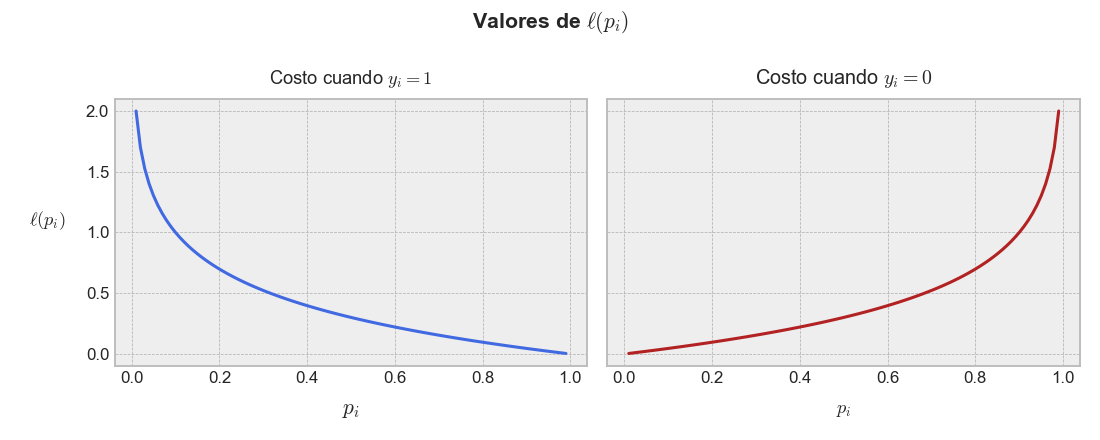

In [12]:
# Graficamos los valores de esta función para cada valor de y.
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))

ax[0].plot(p, positive_loss, color="royalblue", lw=2.0)
ax[0].set_xlabel(r"$p_{i}$", fontsize=14, labelpad=10)
ax[0].set_ylabel(r"$\ell(p_{i})$", fontsize=12, labelpad=25, rotation=0)
ax[0].set_title(r"Costo cuando $y_{i}=1$", fontsize=12, pad=10)

ax[1].plot(p, negative_loss, color="firebrick", lw=2.0)
ax[1].set_xlabel(r"$p_{i}$", fontsize=12, labelpad=10)
ax[1].set_title(r"Costo cuando $y_{i}=0$", fontsize=13, pad=10)

fig.suptitle(r"Valores de $\ell(p_{i})$", fontsize=14, fontweight="bold")
plt.tight_layout()

Podemos observar que, para el caso $y_{i}=1$, el valor de $\ell(p_{i})$ crece exponencialmente a medida que $p_{i}$ decrece. De esta manera, cuando $p_{i}$ es muy pequeño, el valor de la función $\ell$ (y por lo tanto de la correspondiente penalización) tiende a ser muy grande, que es justo lo que queremos porque, para este caso, en efecto, el valor de $y_{i}$ es igual a $1$ y la *probabilidad real* debiera estar lo más cerca posible del valor $p_{i}=1$. 

En el gráfico del lado derecho, podemos observar el fenómeno inverso para el caso $y_{i}=0$, debido a que el valor de $\ell(p_{i})$ crece exponencialmente con el valor de $p_{i}$. Esto quiere decir que, a medida que $1-p_{i}$ se hace más grande, mayor es la penalización que se aplica a esta instancia, porque el valor de $y_{i}$ es igual a $0$ y, por tanto, la *probablidad real* $1-p_{i}$ debiera estar lo más cerca posible del valor $1-p_{i}=0$.

Notemos que $\ell(p_{i})$ cumple, a todas luces, el papel de una **función de costo**. Intuitivamente, el valor de $\ell(p_{i})$ puede interpretarse como la *sorpresa* relativa al resultado real $y_{i}$ en contraste a la predicción de un modelo que estima la probabilidad $p_{i}$, por lo que se trata de una **función de entropía cruzada de tipo binaria**, conforme lo visto en la [clase 1.8](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20I%20-%20Fundamentos%20matem%C3%A1ticos%20elementales/clase_1_8.ipynb). Notemos que esta función de costo siempre tiene un valor igual o mayor que cero, anulándose en caso de que la predicción $p_{i}$ sea igual a $1$, mientras que crece infinitamente cuando $p_{i}\rightarrow 0$; es decir, mientras más incorrecta sea la predicción correspondiente, lo que implica que ésta es más *sorpresiva*. Notemos que, a diferencia de lo que ocurre en el caso de la regresión lineal, donde un modelo puede tener un valor igual a cero en su función de costo en un punto si la función predictora pasa por el punto en cuestión, y un valor global igual a cero si la función predictora pasa por todos los puntos observados, en el modelo de regresión logística esto no es posible, puesto que $y_{i}$ puede tomar los valores $0$ o $1$, pero $0<p_{i}<1$.

Dada la naturaleza binaria de $y_{i}$, podemos reescribir el valor del costo $\ell(p_{i})$ como

$$\ell \left( p_{i}\right)  :=-y_{i}\log \left( p_{i}\right)  -\left( 1-y_{i}\right)  \log \left( 1-p_{i}\right)  \  ;\  i=1,...,2000$$
<p style="text-align: right;">$(3.15)$</p>

La suma de todos los valores de $\ell(p_{i})$ para $i=1,2,...,2000$ se denomina **función de verosimilitud logarítmica** o **log-loss**, y puede escribirse como

$$L\left( p_{i}\right)  :=\sum^{2000}_{i=1} \ell \left( p_{i}\right)  =\sum^{2000}_{i=1} \left( y_{i}\log \left( p_{i}\right)  +\left( 1-y_{i}\right)  \log \left( 1-p_{i}\right)  \right)  $$
<p style="text-align: right;">$(3.16)$</p>

La expresión (3.16) es la **función de costo** más común en la construcción de modelos de clasificación. ◼︎

Vamos a formalizar lo que hemos aprendido del ejemplo anterior por medio de una definición.

**<font color='blue'>Definición 3.1 – Función de verosimilitud logarítmica</font>**: Consideremos un conjunto de entrenamiento $\mathcal{D}$ definido como

$$\mathcal{D} =\left\{ \left( \mathbf{X} ,\mathbf{y} \right)  :\mathbf{X} =\left\{ x_{ij}\right\}  \in \mathbb{R}^{m\times n} \wedge \mathbf{y} \in \mathbb{R}^{m} \right\}  $$
<p style="text-align: right;">$(3.17)$</p>

Donde,

- $\mathbf{X}$ es una matriz que aglutina a las $m$ instancias de $\mathcal{D}$ para un total de $n$ atributos o variables independientes.
- $\mathbf{y}$ es un vector de valores objetivo, tal que $y_{i}$ puede tomar únicamente los valores $1$ o $0$ (para $1\leq i\leq m$).

Sea $\mathbf{x}_{i}\in \mathbb{R}^{n}$ el vector resultante de aislar la instancia $i$-ésima de $\mathbf{X}$, y sea $p_{i}$ la probabilidad de que $y_{i}$ sea igual a $1$, dado el valor de $\mathbf{x}_{i}$. La función $L$, definida como

$$L\left( p_{i}|y_{i}\right)  :=\sum^{m}_{i=1} \left( y_{i}\log \left( p_{i}\right)  +\left( 1-y_{i}\right)  \log \left( 1-p_{i}\right)  \right)  $$
<p style="text-align: right;">$(3.18)$</p>

es llamada **función de verosimilitud logarítmica** para $p_{i}$ dado el valor de $y_{i}$.

## El algoritmo de gradiente descendente.
Vamos a retomar el ejemplo anterior, a fin de motivar un desarrollo un tanto más ambicioso que una simple función de costo. Ahora queremos darle forma al proceso que nos permitirá obtener los parámetros $\theta_{1},\theta_{2}$ y $b=\theta_{0}$. Para ello, haremos uso del algoritmo de gradiente descendente, que ya ilustramos en detalle en la [clase 1.6](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20I%20-%20Fundamentos%20matem%C3%A1ticos%20elementales/clase_1_6.ipynb).

**Ejemplo 3.4 – El modelo de regresión logística binaria:** Prosigamos pues con el ejercicio de las medialunas y el conjunto de datos **<font color='forestgreen'>MOONS</font>**. Conforme la ecuación (3.16), si reemplazamos la probabilidad $p_{i}$ por la expresión (3.13), obtendremos

$$L\left( p_{i}|\mathbf{\theta } \right)  =\sum^{m}_{i=1} \left[ y_{i}\log \left( \phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  +\left( 1-y_{i}\right)  \log \left( 1-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  \right]  $$
<p style="text-align: right;">$(3.19)$</p>

O, en términos matriciales,

$$L\left( \mathbf{y} |\mathbf{\theta } \right)  =\mathbf{y} \log \left( \phi \left( \mathbf{\theta }^{\top } \mathbf{X} \right)  \right)  +\left( 1-\mathbf{y} \right)  \log \left( 1-\phi \left( \mathbf{\theta }^{\top } \mathbf{X} \right)  \right)  $$
<p style="text-align: right;">$(3.20)$</p>

Uno de los aspectos más convenientes de la función logística $\phi$ es que, mediante una manipulación algebraica sencilla, podemos expresar su derivada en términos de la propia función. En efecto, sea $u\in \mathbb{R}$. De esta manera,

$$\begin{array}{lll}\phi^{\prime } \left( u\right)  &=&\displaystyle \frac{-1}{\left( 1+\exp \left( -u\right)  \right)^{2}  } \left( -1\right)  \left( \exp \left( -u\right)  \right)  \\ &=&\displaystyle \frac{\exp \left( -u\right)  }{\left( 1+\exp \left( -u\right)  \right)^{2}  } \\ &=&\displaystyle \frac{\exp \left( -u\right)  }{1+\exp \left( -u\right)  } \cdot \frac{1}{1+\exp \left( -u\right)  } \\ &=&\displaystyle \frac{-1+1+\exp \left( -u\right)  }{1+\exp \left( -u\right)  } \cdot \frac{1}{1+\exp \left( -u\right)  } \\ &=&\displaystyle \left( -\frac{1}{1+\exp \left( -u\right)  } +\frac{1+\exp \left( -u\right)  }{1+\exp \left( -u\right)  } \right)  \frac{1}{1+\exp \left( -u\right)  } \\ &=&\displaystyle \left( -\frac{1}{1+\exp \left( -u\right)  } +1\right)  \frac{1}{1+\exp \left( -u\right)  } \\ &=&\displaystyle \left( 1-\underbrace{\frac{1}{1+\exp \left( -u\right)  } }_{\phi \left( u\right)  } \right)  \underbrace{\frac{1}{1-\exp \left( -u\right)  } }_{\phi \left( u\right)  } \\ &=&\displaystyle \left( 1-\phi \left( u\right)  \right)  \phi \left( u\right)  \end{array} $$
<p style="text-align: right;">$(3.21)$</p>

Así que, efectivamente, la derivada de $\phi$ puede expresarse en términos de la misma función.

La función de costo (3.19) debe maximizarse, puesto que de esta manera las penalizaciones derivadas de los errores del modelo serán mínimas (o, en palabras menos rimbombantes, los errores de estimacion serán lo más pequeños posibles). Por lo tanto, para estimar los parámetros que se agrupan en el vector $\mathbf{\theta}\in \mathbb{R}^{3}$, debemos resolver el problema de optimización no restringido

$$\begin{array}{ll}\displaystyle \max_{\mathbf{\theta } } &\displaystyle \sum^{m}_{i=1} \left[ y_{i}\log \left( \phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  +\left( 1-y_{i}\right)  \log \left( 1-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  \right]  \end{array} $$
<p style="text-align: right;">$(3.22)$</p>

Para resolver el problema anterior, es necesario calcular el gradiente de $L$ con respecto a los parámetros $\theta_{0},\theta_{1}$ y $\theta_{2}$, a fin de buscar los puntos críticos que anulan el valores de las correspondientes derivadas parciales que integran dicho gradiente. Para $\mathbf{\theta}=(\theta_{0},\theta_{1},\theta_{2})\in \mathbb{R}^{3}$, tendremos entonces que

$$\begin{array}{lll}\displaystyle \frac{\partial L}{\partial \theta_{j} } &=&\displaystyle \frac{\partial }{\partial \theta_{j} } \sum^{m}_{i=1} \left[ y_{i}\log \left( \phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  +\left( 1-y_{i}\right)  \log \left( 1-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  \right]  \\ &=&\displaystyle \sum^{m}_{i=1} \left[ \frac{y_{i}}{\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  } \phi^{\prime } \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \mathbf{x}_{i} +\frac{1-y_{i}}{1-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  } \left( -\phi^{\prime } \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  \mathbf{x}_{i} \right]  \\ &=&\displaystyle \sum^{m}_{i=1} \left[ \frac{y_{i}\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \left( 1-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  }{\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  } +\frac{\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \left( y_{i}-1\right)  \left( 1-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  }{1-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  } \right]  \mathbf{x}_{i} \\ &=&\displaystyle \sum^{m}_{i=1} \left[ y_{i}\left( 1-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right)  +\left( y_{i}-1\right)  \phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right]  \mathbf{x}_{i} \\ &=&\displaystyle \sum^{m}_{i=1} \left[ y_{i}\underbrace{-y_{i}\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  +y_{i}\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  }_{=0} -\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right]  \mathbf{x}_{i} \\ &=&\displaystyle \sum^{m}_{i=1} \left[ y_{i}-\phi \left( \mathbf{\theta }^{\top } \mathbf{x}_{i} \right)  \right]  \mathbf{x}_{i} \end{array} $$
<p style="text-align: right;">$(3.23)$</p>

De esta manera, el algoritmo de gradiente descendente (que vimos en la [clase 1.6](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20I%20-%20Fundamentos%20matem%C3%A1ticos%20elementales/clase_1_6.ipynb)) toma la forma

$$\theta^{\left( k+1\right)  }_{j} =\theta^{\left( k\right)  }_{j} -\gamma \frac{\partial L}{\partial \theta_{j} } $$
<p style="text-align: right;">$(3.24)$</p>

Para $j=1,2,3$, donde el hiperparámetro $\gamma$ es la **tasa de aprendizaje** del algoritmo.

El modelo de clasificación resultante de este procedimiento es un caso particular de **modelo lineal generalizado**, muy conocido en el aprendizaje automático, conocido como **modelo de regresión logística binaria**.

**<font color='mediumorchid'>Scikit-Learn</font>** cuenta con una implementación nativa del algoritmo de gradiente descendente en su versión estocástica (SGD) tanto para modelos de clasificación como para modelos de regresión, estando ambos disponibles en el módulo `sklearn.linear_model`. Sin embargo, a fin de *entrenar los dedos* escribiendo algo de código, crearemos una implementación desde cero que seguirá absolutamente todas las reglas de la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>** a la hora de entrenar el correspondiente modelo y obtener predicciones. Nos valdremos, para ello, de la librería **<font color='mediumorchid'>Numpy</font>**, que es especialmente útil para trabajar con operaciones matriciales.

Debido a que la API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>** está orientada a objetos, nuestro modelo se instanciará por medio del uso de una clase que, consecuentemente, llamaremos `BinaryLogisticRegression`, a fin de diferenciarla de la implementación nativa de **<font color='mediumorchid'>Scikit-Learn</font>**, denominada `LogisticRegression`, y que ejemplificaremos más adelante en detalle:

In [13]:
from tqdm import tqdm

In [14]:
# Creamos nuestra clase.
class BinaryLogisticRegression:
    def __init__(self, lr=0.01, n_iter=2000, tol=1e-4):
        """
        Inicialización del modelo en base a hiperparámetros necesarios para definir el curso de acción
        del algoritmo de gradiente descendente.

        Parámetros:
        -----------
        lr : Tasa de aprendizaje del modelo.
        n_iter : Número de iteraciones a efectuar por el algoritmo de gradiente descendente.
        tol : Tolerancia de nuestra implementación. Este hiperparámetro se fija para evitar iterar demasiado
        si la diferencia entre una predicción y la subsiguiente, en el proceso de ajuste, no supera dicho
        valor de tolerancia.

        """
        self.lr = lr
        self.n_iter = n_iter
        self.tol = tol
        self.coef_ = None # Aquí almacenaremos los parámetros estimados por el algoritmo.
        self.intercept_ = None # Aquí almacenaremos el parámetro de sesgo estimado por el algoritmo.

    def _logistic(self, u):
        """
        Método que permite implementar la función logística sobre un arreglo arbitrario, siempre que éste
        sea unidimensional.
        
        Parámetros:
        -----------
        u : Arreglo 1D para el cual calculamos los valores de la función logística.

        Retorna:
        --------
        Arreglo 1D con los valores calculados para la función logística.
        """
        return 1 / (1 + np.exp(-u))

    def _log_loss(self, y, p):
        """
        Método que permite implementar la función de entropía cruzada binaria (log-loss) como función de
        costo para nuestro modelo.

        Parámetros:
        -----------
        y : Categorías que deseamos utilizar como base para entrenar nuestro modelo.
        p : Probabilidades estimadas por el modelo de que y == 1.

        Retorna:
        --------
        Valor medio del costo calculado.
        """
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

    def fit(self, X, y):
        """
        Método que permite el entrenamiento del modelo.

        Parámetros:
        -----------
        X : Arreglo 2D de dimensión (n_instances, n_features) que aglutina toda la información de entrada 
        necesaria para entrenar nuestro modelo.
        y : Arreglo 1D con las etoquetas o categorías usadas como base para entrenar nuestro modelo.
        """
        # Obtenemos las dimensiones del arreglo X.
        n_instances, n_features = X.shape

        # Inicializamos los valores de los parámetros a estimar por el modelo.
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0.0

        # Defimos un valor inicial de costo.
        previous_loss = float("inf")

        # Implementamos el algoritmo de gradiente descendente. Usamos igualmente una barra de progreso.
        for i in tqdm(range(self.n_iter), desc="Entrenando el modelo"):
            # Calculamos el valor de la hipótesis o función de decisión.
            decision_val = np.dot(X, self.coef_) + self.intercept_

            # Pasamos este valor por la función logística, a fin de obtener la probabilidad correspondiente.
            y_prob = self._logistic(decision_val)

            # Calculamos el valor de la función de costo.
            current_loss = self._log_loss(y, y_prob)

            # Chequeamos la convergencia del algoritmo usando el parámetro de tolerancia.
            if np.abs(previous_loss - current_loss) < self.tol:
                print(f"Convergencia del algoritmo alcanzada en iteración nº{i}")
                break

            # Actualizamos el valor del costo.
            previous_loss = current_loss

            # Calculamos los gradientes correspondientes.
            dw = (1 / n_instances) * np.dot(X.T, (y_prob - y))
            db = (1 / n_instances) * np.sum(y_prob - y)

            # Actualizamos los valores de los parámetros del modelo.
            self.coef_ -= self.lr * dw
            self.intercept_ -= self.lr * db

    def predict_proba(self, X):
        """
        Método que nos permite estimar las probabilidades P(y == 1) por medio de nuestro modelo.

        Parámetros:
        -----------
        X : Arreglo 2D de dimensión (n_instances, n_features) que aglutina toda la información de entrada
        necesaria para entrenar nuestro modelo.

        Retorna:
        --------
        Probabilidades estimadas.
        """
        # Calculamos el valor de la hipótesis o función de decisión.
        decision_val = np.dot(X, self.coef_) + self.intercept_

        # Pasamos este valor por la función logística, a fin de obtener la probabilidad correspondiente.
        y_prob = self._logistic(decision_val)

        return y_prob

    def predict(self, X):
        """
        Método que nos permite estimar las clases o categorías directamente por medio del modelo.

        Parámetros:
        -----------
        X : Arreglo 2D de dimensión (n_instances, n_features) que aglutina toda la información de entrada
        necesaria para entrenar nuestro modelo.

        Retorna:
        --------
        Clases estimadas.
        """
        # Obtenemos las correspondientes probabilidades de pertenencia a la clase y == 1.
        y_prob = self.predict_proba(X)

        # Y las convertimos a categorías. Notemos que aquí hemos definido de manera rígida que el umbral que
        # separa a las clases y == 1 de y == 0 es la probabilidad P(y == 1) = 0.5.
        y_pred = np.where(y_prob >= 0.5, 1, 0)
        
        return y_pred

    def decision_function(self, X):
        """
        Método que nos permitirá obtener los valores de decisión que se usan como entrada para la implemen-
        tación de la función logística en el modelo. En rigor, estos valores permiten trazar la frontera
        de decisión que separa las clases estimadas por el modelo.

        Parámetros:
        -----------
        X : Arreglo 2D de dimensión (n_instances, n_features) que aglutina toda la información de entrada
        necesaria para entrenar nuestro modelo.

        Retorna:
        --------
        Valores de decisión estimados.
        """
        # Calculamos el valor de la hipótesis o función de decisión.
        decision_val = np.dot(X, self.coef_) + self.intercept_

        return decision_val

Se ha provisto una completa documentación de nuestra clase `BinaryLogisticRegression`, a fin de entender qué estamos haciendo en cada una de las líneas de código. Sin embargo, se trata de una aplicación paso a paso del algoritmo de gradiente descendente para estimar los parámetros agrupados en el vector $\mathbf{\theta}$, tomando como costo la función de entropía cruzada binaria o *log-loss* (definición (3.1)).

Sin mucho más que agregar, ya sólo nos resta probar nuestra implementación. Lo primero entonces es instanciar nuestro modelo en alguna variable, que típicamente denominamos `model`:

In [15]:
# Instanciamos nuestro modelo.
model = BinaryLogisticRegression()

Ahora usamos el método `fit()` para entrenar nuestro modelo. Observemos que, para ello, es necesario tomar como argumentos los arreglos `X` e `y` previamente definidos:

In [16]:
# Entrenamos nuestro modelo usando todos los datos.
model.fit(X, y)

Entrenando el modelo:  46%|█████▌      | 929/2000 [00:00<00:00, 9807.32it/s]

Convergencia del algoritmo alcanzada en iteración nº929


A fin de entender qué hemos hecho al entrenar nuestro modelo, vamos a jugar un poco con sus *perillas* y construiremos algunas visualizaciones interesantes. Primero, entenderemos la importancia de la función logística como base para darle sentido a los valores de la función de costo, a fin de representar el error que comete este modelo. Para ello, podemos tomar cualquera de las variables independientes que conforman el arreglo `X` y graficar sus valores versus las correspondientes etiquetas:

In [17]:
# Concatenamos los arreglos X e y, a fin de poder filtrar los valores de las variables independientes en términos
# de su correspondiente etiqueta.
full_set = np.hstack([X, y.reshape(-1, 1)])

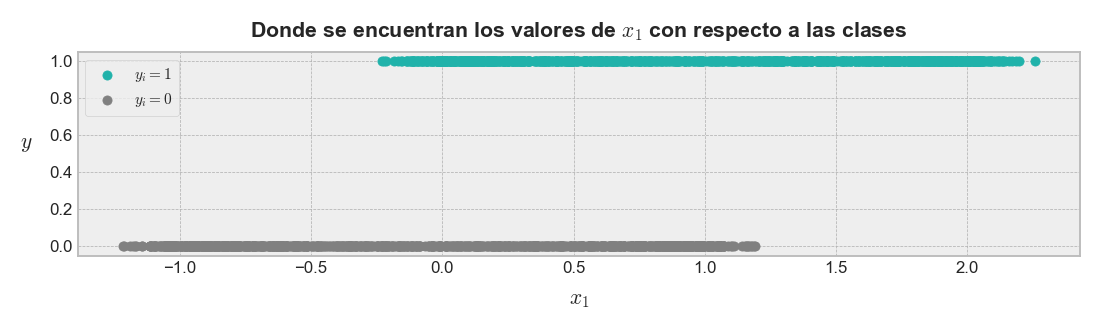

In [18]:
# Graficamos los valores de la primera variable independiente en términos de la correspondiente etiqueta de clase.
fig, ax = plt.subplots(figsize=(10, 3))
ax.scatter(
    full_set[full_set[:, 2] == 1][:, 0], full_set[full_set[:, 2] == 1][:, 2], 
    color="lightseagreen", marker="o", label=r"$y_{i}=1$",
)
ax.scatter(
    full_set[full_set[:, 2] == 0][:, 0], full_set[full_set[:, 2] == 0][:, 2], 
    color="gray", marker="o", label=r"$y_{i}=0$",
)
ax.legend(loc="upper left", frameon=True, fontsize=10)
ax.set_xlabel(r"$x_{1}$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=14, labelpad=15, rotation=0)
ax.set_title(r"Donde se encuentran los valores de $x_{1}$ con respecto a las clases", pad=10, fontsize=14, fontweight="bold")
plt.tight_layout();

Podemos observar que, a medida que nos acercamos al valor $x_{1}=0.5$, hay cada vez mayor superposición de los puntos tales que $y_{i}=1$ e $y_{0}=0$, lo que naturalmente deriva en que cualquier modelo, basándose únicamente en el valor de esta variable independiente, *confunda* dónde se encuentran los valores asociados a cada clase, generando un mayor nivel de *sorpresa* en los resultados obtenidos, siendo estos puntos (que se ubican, aproximadamente, en el intervalo $[-0.35, 1.20]$, los que concentran los mayores valores de costo derivados de la implementación de la función de entropía cruzada binaria (para cada clase). Por el contrario, para $x_{1}>1.2$, es claro que $y_{i}=1$, mientras que, para $x_{1}<-0.35$, es claro que $y_{i}=0$. Es decir, no hay *sorpresa* y, por extensión, es muy difícil que el modelo sufra de *confusión* en tales intervalos a la hora de clasificar estos puntos.

Podemos chequear lo anterior graficando la función logística en la misma figura anterior:

In [19]:
# Obtenemos los valores de la función logística haciendo uso de la función de decisión del modelo.
u = model.decision_function(X)
u = np.sort(u)
p = 1 / (1 + np.exp(-u))

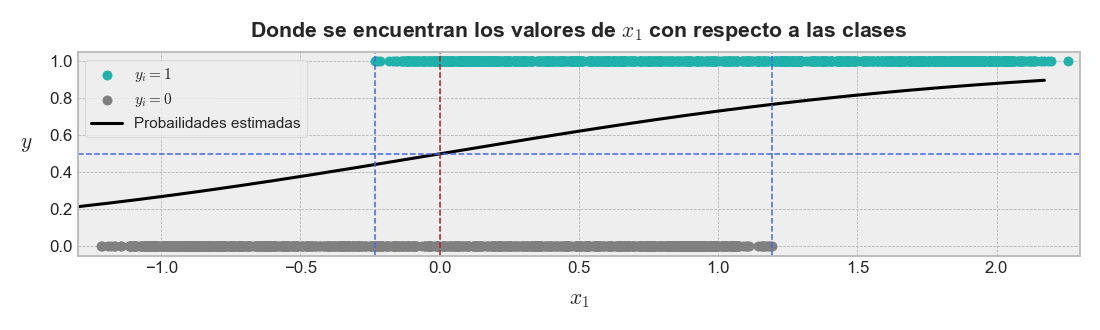

In [20]:
# Añadimos estos valores de probabilidad al gráfico anterior.
fig, ax = plt.subplots(figsize=(10, 3))
ax.scatter(
    full_set[full_set[:, 2] == 1][:, 0], full_set[full_set[:, 2] == 1][:, 2], 
    color="lightseagreen", marker="o", label=r"$y_{i}=1$",
)
ax.scatter(
    full_set[full_set[:, 2] == 0][:, 0], full_set[full_set[:, 2] == 0][:, 2], 
    color="gray", marker="o", label=r"$y_{i}=0$",
)
ax.plot(u, p, label="Probailidades estimadas", lw=2.0, color="black")
ax.axvline(x=0, lw=1.0, color="firebrick", linestyle="--")
ax.axvline(x=full_set[full_set[:, 2] == 1][:, 0].min(), lw=1.0, color="royalblue", linestyle="--")
ax.axvline(x=full_set[full_set[:, 2] == 0][:, 0].max(), lw=1.0, color="royalblue", linestyle="--")
ax.axhline(y=0.5, lw=1.0, color="royalblue", linestyle="--")
ax.set_xlim(-1.3, 2.3)
ax.legend(loc="upper left", frameon=True, fontsize=10)
ax.set_xlabel(r"$x_{1}$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$y$", fontsize=14, labelpad=15, rotation=0)
ax.set_title(r"Donde se encuentran los valores de $x_{1}$ con respecto a las clases", pad=10, fontsize=14, fontweight="bold")
plt.tight_layout();

Notemos que, efectivamente, la función logística asigna probabilidades similares de pertenencia de clase a cada valor de $x_{1}$ en el intervalo $[0.35, 1.20]$, lo que induce que los errores cometidos por el modelo se concentren en dicho intervalo, representado en el gráfico por el subespacio encerrado entre ambas líneas segmentadas verticales. Debido a que la función logística es simétrica respecto de las rectas $x=0$ e $y=0.5$, el punto $(0, 0.5)$ es el de máxima entropía, porque el modelo asigna la misma probabilidad de pertenencia a este punto a cada clase.

Debido a que hay muchos menos valores de $x_{1}$ tales que $y=1$ a la izquierda de la recta $x=0$, que valores de $x_{1}$ tales que $y=0$ a la derecha de la misma, es claro que, en base únicamente a $x_{1}$, este modelo comete muchos más errores estimando la clase negativa, lo que implica un **sesgo a favor de la clase positiva** muy significativo. Esto es un caso particular resultante de la implementación de un modelo de clasificación que abordaremos en detalle más adelante, pero basta por ahora con saber que la información provista por la variable $x_{2}$ permite balancear este sesgo.

Para finalizar este bonito ejemplo, vamos a ilustrar el significado de la función de decisión o hipótesis subyacente al modelo. Dicha función de decisión corresponde a la combinación de los parámetros estimados por el modelo y los valores que constituyen las variables de entrada del mismo. Geométricamente, la recta resultante de dicha combinación representa una **línea divisoria** que separa todos los puntos que el modelo estima como pertenencientes a la clase positiva de los otros que el modelo estima como pertenencientes a la clase negativa.

Grafiquemos esto rápidamente, haciendo uso de los parámetros estimados por el modelo. Recordemos que, en este caso particular, como $\mathbf{X}\in \mathbb{R}^{2000\times 2}$, esta recta tiene como ecuación a $\theta_{1}x_{1}+\theta_{2}x_{2}+b$. Despejando $x_{2}$, nos queda una ecuación explícita: $x_{2}=-b-\frac{\theta_{1} }{\theta_{2} } x_{1}$. Así que:

In [21]:
# Obtenemos los parámetros estimados por el modelo.
b = model.intercept_
theta = model.coef_

In [22]:
# Calculamos el recorrido de la recta que representa el umbral de discriminación del modelo.
line = (-b - theta[0] * X[:, 0]) / theta[1]

In [23]:
# Obtenemos las predicciones realizadas por el modelo.
y_pred = model.predict(X)

In [24]:
# Juntamos todo en una única matriz.
preds = np.hstack([X, y_pred.reshape(-1, 1)])

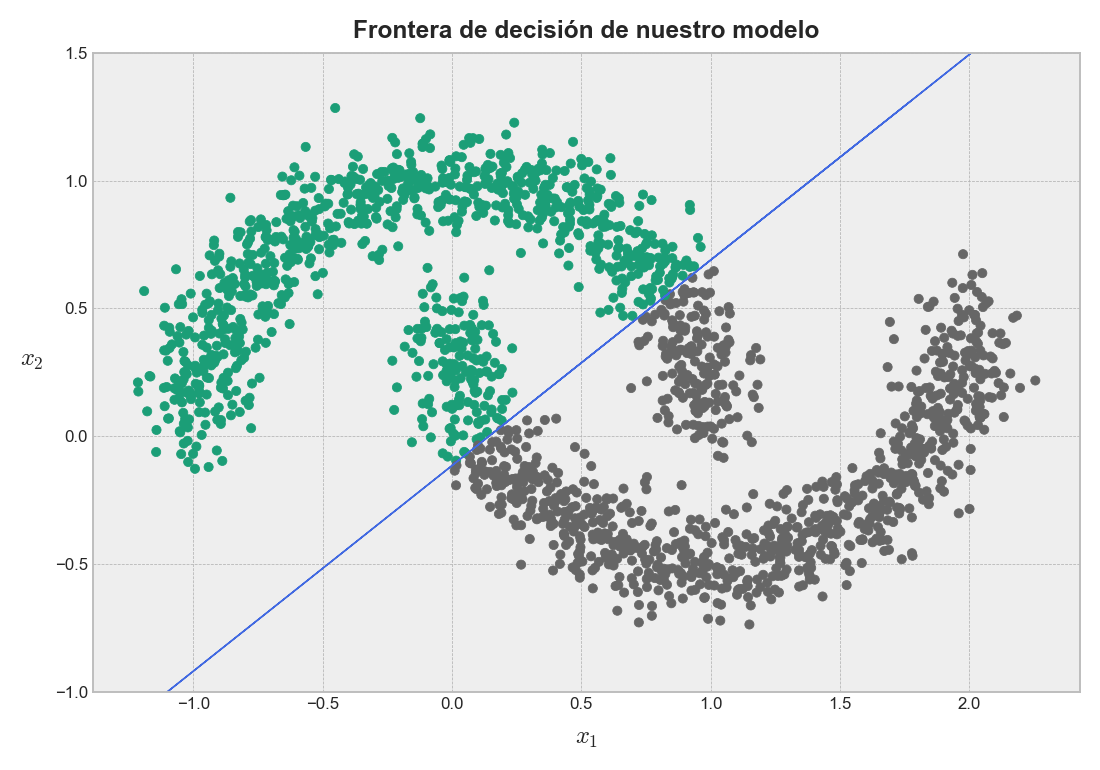

In [25]:
# Graficamos los resultados del modelo.
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(preds[:, 0], preds[:, 1], c=preds[:, 2], marker="o", cmap="Dark2")
ax.set_xlabel(r"$x_{1}$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$x_{2}$", fontsize=16, labelpad=15, rotation=0)
ax.plot(X[:, 0], line, color="royalblue", lw=1.0)
ax.set_ylim(-1.0, 1.5)
ax.set_title("Frontera de decisión de nuestro modelo", pad=10, fontsize=16, fontweight="bold")
plt.tight_layout();

La gráfica de la función de decisión deja claro que su interpretación geométrica es la de una **frontera de decisión**, que separa a aquellos puntos que el modelo clasifica como pertenencientes a una clase de los demás. La frontera, naturalmente, es lineal, porque la función de decisión también lo es. Por esta razón, a pesar de que el modelo de regresión logística binaria es esencialmente no lineal, es parte de la familia de **modelos lineales generalizados**. Esto es algo que abordaremos más en detalle cuando desarrollemos los fundamentos de los modelos de regresión, más adelante. ◼︎

## Muestreo estratificado.
La implementación construida previamente del modelo de regresión logística binaria es simple y muy efectiva, porque en realidad es agnóstica respecto del tipo de problema a resolver, siempre que éste sea binario. No obstante, cometimos (a propósito) un error importante en en entrenamiento del modelo anterior, que discutiremos en detalle a continuación: No separamos el conjunto de datos **<font color='forestgreen'>MOONS</font>** en los correspondientes conjuntos de entrenamiento y de prueba. Por lo tanto, a la hora de estimar el desempeño del modelo (más allá de los resultados visuales obtenidos al graficar su función de decisión), no podremos determinar su **capacidad de generalizar su aprendizaje**.

Por esta razón, es necesario generar una división del conjunto de datos que hemos construido. Sin embargo, para el caso de los modelos de clasificación, es importante tener algunas consideraciones importantes relativas a la **representatividad** de los conjuntos de entrenamiento y de prueba. Y es ahí donde cobre especial relevancia la técnica de **muestreo estratificado**.

El muestreo estratificado es un procedimiento utilizado comúnmente en el contexto del aprendizaje automático para asegurar que cualquier subgrupo (o *estrato*) de un conjunto de datos $\mathcal{D}$ esté adecuadamente representado dentro de una muestra. Para un problema de clasificación binaria, donde únicamente la variable de salida es categórica, el correspondiente conjunto de datos puede dividirse en dos estratos, digamos $\mathcal{D}_{0}$ y $\mathcal{D}_{1}$. Queremos pues muestrear de cada estrato proporcionalmente a su representación en el conjunto de datos completo $\mathcal{D}$ para **mantener la distribución de las etiquetas de salida** en el subconjunto muestreado. Esta técnica es particularmente útil cuando el conjunto de datos está **desbalanceado**, es decir, **cuando una clase supera significativamente a la otra** (algo que, en el *mundo real*, sucede con frecuencia).

**<font color='blue'>Definición 3.2 – Muestreo estratificado (problema binario)</font>**: Dado un conjunto de datos $\mathcal{D}$ descrito por la matriz de datos de entrada $\mathbf{X}\in \mathbb{R}^{m\times n}$, donde $m$ es el número de instancias y $n$ es el número de atributos o variables independientes, y el vector de salida de etiquetas o categorías $\mathbf{y}\in \mathbb{R}^{m}$ para un problema de clasificación, donde $\mathbf{y}$ solo puede tomar dos valores, $0$ o $1$, el proceso de muestreo estratificado puede definirse secuencialmente de la siguiente manera:

1) **Particionar $\mathcal{D}$:** Dividir $\mathbf{X}$ en dos subconjuntos, $\mathbf{X}^{\left( 0\right)  } $ y $\mathbf{X}^{\left( 1\right)  } $, basados en las etiquetas en $\mathbf{y}$. $\mathbf{X}^{\left( 0\right)  } $ contiene todas las instancias donde la etiqueta correspondiente en $\mathbf{y}$ es $0$, y $\mathbf{X}^{\left( 1\right)  } $ contiene todas las instancias donde la etiqueta correspondiente en $\mathbf{y}$ es $1$. Así, para cualquier instancia $i$, si $y_i = 0$, entonces $\mathbf{x}_{i} \in \mathbf{X}^{\left( 0\right)  } $; si $y_i = 1$, entonces $\mathbf{x}_{i} \in \mathbf{X}^{\left( 1\right)  } $.
2) **Determinar los tamaños de la muestra:** Sean $m_0$ y $m_1$ el número de instancias en $\mathbf{X}^{\left( 0\right)  } $ y $\mathbf{X}^{\left( 1\right)  } $, respectivamente, tal que $m_0 + m_1 = m$. Determinamos los tamaños de muestra $s_0$ y $s_1$ para cada estrato. Estos tamaños pueden determinarse basados en la **fracción de muestreo** deseada $f$ (siendo por tanto $f$ un **hiperparámetro**), donde $f =s/m$, y $s = s_0 + s_1$ es el **tamaño total de la muestra**. Los tamaños de muestra también pueden ser directamente proporcionales a los tamaños de los estratos en el conjunto de datos completo: $s_0 = f m_0$ y $s_1 = f m_1$.
3) **Muestrear cada estrato:** Muestrear **aleatoriamente** $s_0$ instancias de $\mathbf{X}^{\left( 0\right)  }$ y $s_1$ instancias de $\mathbf{X}^{\left( 1\right)  }$. Esto se puede hacer **sin reemplazo** para asegurar que cada instancia se seleccione como máximo una vez.

La muestra resultante es un subconjunto de $\mathbf{X}$, denotado como $\mathbf{X}_{\text{sample}} \in \mathbb{R}^{s\times n}$, y las etiquetas correspondientes $\mathbf{y}_{\text{sample}} \in \mathbb{R}^{s}$, donde $s = s_0 + s_1$. Este muestreo asegura que la proporción de cada clase en la muestra coincida estrechamente con la proporción en el conjunto de datos completo, lo cual es crucial para mantener las propiedades estadísticas del conjunto de datos y para la efectividad de los modelos de aprendizaje automático entrenados con los datos muestreados.

**Ejemplo 3.5 – El efecto del muestreo estratificado:** Vamos a considerar, en esta oportunidad, otro conjunto de datos. En **<font color='mediumorchid'>Scikit-Learn</font>**, es posible, como vimos en la [clase 2.2](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20II%20-%20Modelos%20de%20aprendizaje%20supervisado/clase_2_2.ipynb), separar cualquier conjunto de datos en conjuntos de entrenamiento y de prueba haciendo uso de la función `train_test_split()`. Esta función recibe los siguientes argumentos:

- `*arrays`: Conjunto de arreglos sobre los cuales aplicamos el muestreo.
- `test_size`: Número flotante, entre `0` y `1`, que representa la proporción (en tanto por uno) de datos que pasarán al conjunto de prueba. Por ejemplo, `test_size=0.2` implica que el 20% de las instancias de nuestro conjunto de datos serán las que utilizaremos para construir nuestro conjunto de prueba.
- `shuffle`: Parámetro booleano que permite decidir si mezclamos o no nuestros datos de manera previa al proceso de muestreo. Este procedimiento es importante a fin de aleatorizar la muestra, pero no es siempre aplicable a cualquier conjunto de datos, puesto que muchos problemas a resolver en aprendizaje automático toman en consideración el **orden de las instancias u observaciones** que componen su correspondiente conjunto de datos. Una mezcla aleatoria destruye dicho ordenamiento.
- `stratify`: Parámetro que permite asignar la etiqueta del atributo que se usará como base para construir un **muestreo estratificado**. Es aquí donde diferenciamos el tipo de muestreo que realizamos para construir los conjuntos de entrenamiento y de prueba.
- `random_state`: Como siempre, la semilla aleatoria fija que permite reproducir eel resultado de la separación.

Para ejemplificar el efecto del tipo de muestreo, haremos uso de otro conjunto de datos, llamado **<font color='forestgreen'>MNIST</font>**, el cual corresponde a un conjunto de 70000 imágenes de dígitos manuscritos escritos por estudiantes de secundaria y empleados de la Oficina del Censo de los Estados Unidos. Cada imagen está etiquetada con un dígito que ésta representa. Este conjunto de datos se ha estudiado y analizado tantas veces que, con frecuencia, es llamado el “¡Hola mundo!” de los modelos de clasificación. Su uso es aún más común que el del *toyset* **<font color='forestgreen'>IRIS</font>**, porque además permite que los estudiantes se hagan una idea de cómo es trabajar con modelos que aceptan *imágenes** como datos de entrada.

Para cargar este conjunto de datos, haremos uso de la función `fetch_openml()`, cuta dependencia es –por supuesto– el módulo `sklearn.datasets`. Esta función puede cargar una serie de conjuntos de datos desde el laboratorio abierto de machine learning llamado [OpenML](https://www.openml.org/search?type=data&sort=runs&status=active), cuyo objetivo es el mejoramiento, en un ambiente libre, de modelos (y datasets) por parte de los practicantes, entusiastas y profesionales del mundo de los datos:

In [26]:
import pandas as pd

In [27]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

La función `fetch_openml()` trabaja con los siguientes parámetros:

- `name`: El nombre del dataset. Estos deben consultarse en la base de datos de OpenML. Para el caso del conjunto de datos **<font color='forestgreen'>MNIST</font>**, bastará con usar el string `"mnist_784"`, donde el número `784` hace referencia al total de pixeles que constituye cada imagen (24$\times$24).
- `as_frame`: Parámetro que permite definir si el conjunto de datos vendrá en un formato de arreglo de **<font color='mediumorchid'>Numpy</font>**, o de DataFrame de **<font color='mediumorchid'>Pandas</font>**.
- `return_X_y`: Parámetro booleano que permite especificar si el dataset se retornará separado ya en una matriz de atributos de entrada `X` y en un vector/arreglo de valores de respuesta `y`.

De esta manera, cargar este dataset es muy sencillo:

In [28]:
# Cargamos el conjunto de datos MNIST.
mnist_data = fetch_openml(name="mnist_784", as_frame=True, parser="auto")

In [29]:
# Consultamos la información relativa a este conjunto datos.
print(mnist_data["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

La descripción del dataset indica que éste está compuesto por un total de 70000 imágenes de dígitos manuscritos, cada una de las cuales se caracteriza por un total de 784 atributos. Este número parece grande, pero en realidad, el número de atributos responde simplemente al hecho de que cada imagen de este dataset está constituida por un total de 784 pixeles, distribuidos en un marco de 28$\times$28 pixeles. Cada dato asociado a un pixel es un número que representa la intensidad de un pixel en una escala de grises, del 0 (completamente blanco) hasta el 255 (completamente negro).

A fin de entender cómo son las imágenes que comprenden este dataset, grafiquemos algunas de ellas. Pero antes, revisemos el etiquetado de las columnas de las mismas:

In [30]:
# Primeras cinco imágenes especificadas por los valores de intensidad de pixel.
mnist_data["data"].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vemos pues que cada columna de la matriz de atributos de entrada está etiquetada con el nombre `"pixelj"`, donde `j` hace referencia al pixel propiamente tal. Por otro lado, el vector de valores de salida (expresado como una serie de **<font color='mediumorchid'>Pandas</font>**) tiene la siguiente estructura:

In [31]:
# Las etiquetas asociadas a las primeras cinco
mnist_data["target"].head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Con esta información, ya podemos construir la visualización deseada para las primeras 100 imágenes:

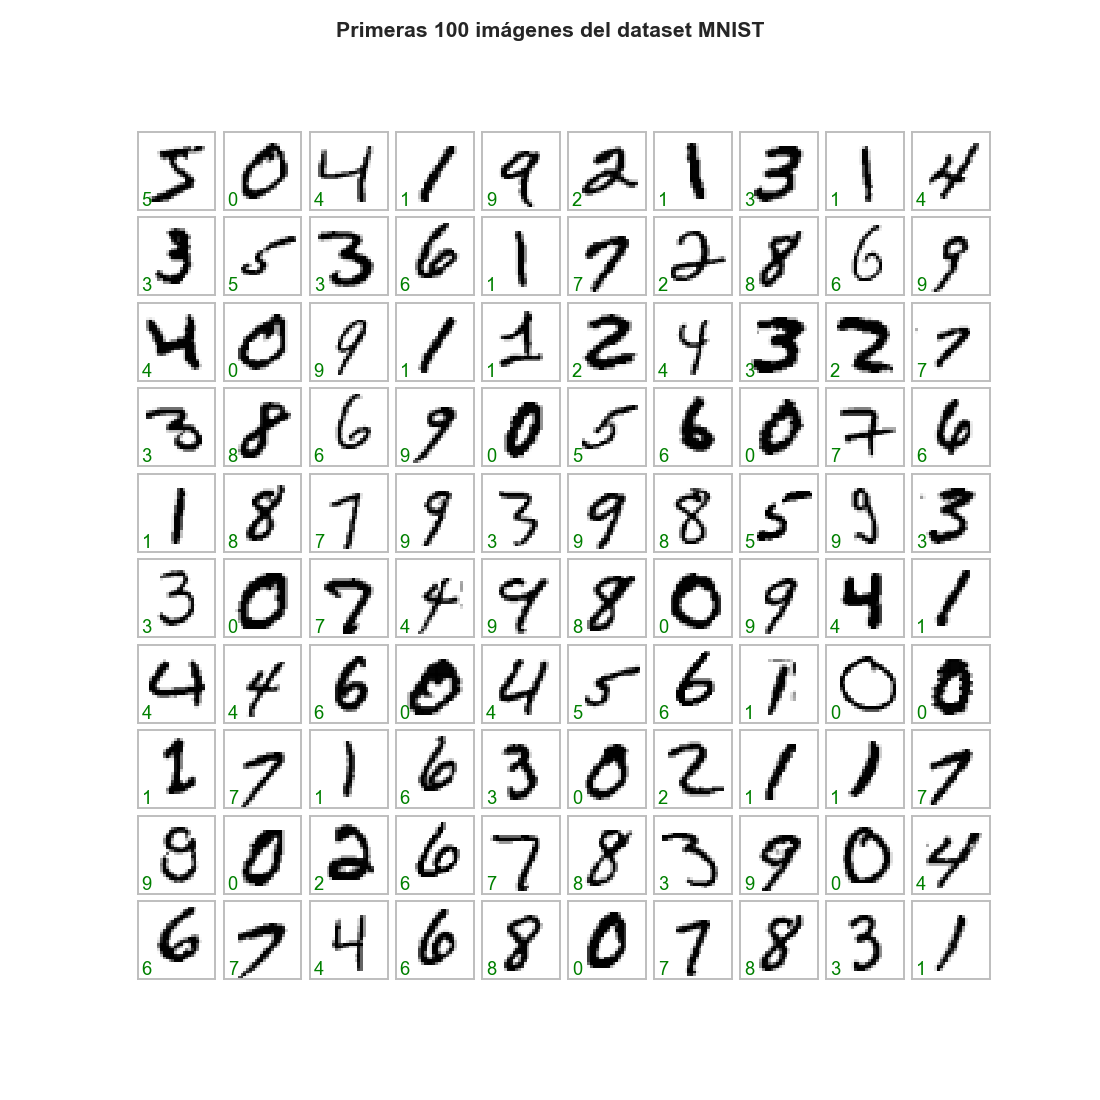

In [32]:
# Primeras 100 imágenes del dataset MNIST.
fig, axes = plt.subplots(
    nrows=10, ncols=10, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, 
    gridspec_kw=dict(hspace=0.1, wspace=0.1)
)
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist_data["data"].loc[i].values.reshape(28, 28) ,cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(mnist_data["target"][i]), transform=ax.transAxes, color='green')
fig.suptitle("Primeras 100 imágenes del dataset MNIST", fontsize=14, fontweight="bold");

Notemos que la distribución de frecuencias de cada uno de los dígitos no es la misma:

In [33]:
# Distribución de frecuencias de cada categoría.
mnist_data["target"].value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

El dataset **<font color='forestgreen'>MNIST</font>** es frecuentemente utilizado para testear **modelos de clasificación multinomial**, debido a que la variable de respuesta especifica el número al que representa cada una de las imágenes. De esta manera, en un caso general, estamos interesados en construir un modelo capaz de discriminar a qué dígito corresponde cada imagen. Sin embargo, trataremos el subproblema relativo a intentar clasificar un único número de los 10 disponibles en el dataset, que sí es un problema binario.

Probemos con el número `7`. De este modo, creamos una variable `y` que tendrá el valor `1` si el correspondiente dígito representa un `7`, y `0` en cualquier otro caso:

In [34]:
# Creamos nuestra variable de respuesta binaria.
y = pd.Series(
    data=np.where(mnist_data["target"] == "7", "1", "0"), 
    index=mnist_data["target"].index,
    name="class",
).astype("category")

Y ahora la distribución es la siguiente:

In [35]:
# Distribución de frecuencias de cada categoría.
y.value_counts()

class
0    62707
1     7293
Name: count, dtype: int64

Vemos pues que poco más del 11% de las instancias son tales que `y == 1`.

Si generamos un muestreo aleatorizado común para construir los conjuntos de entrenamiento y de prueba, ocurrirá lo siguiente:

In [36]:
# Generamos un DataFrame con todos los datos.
data = pd.concat([mnist_data["data"].copy(), y], axis=1)

In [37]:
# Construimos los conjuntos de entrenamiento y de prueba por medio de un muestreo aleatorizado.
train_set, test_set = train_test_split(
    data, test_size=0.2, random_state=42,
)

In [38]:
# Distribución de frecuencias de las clases en cada subconjunto.
print(
    "Proporción de dígitos iguales a 7 en el conjunto de datos completo = "
    +f"{round(100 * data['class'].value_counts() / data.shape[0], 2).iloc[1]} %"
)
print(
    "Proporción de dígitos iguales a 7 en el conjunto de entrenamiento = "
    +f"{round(100 * train_set['class'].value_counts() / train_set.shape[0], 2).iloc[1]} %"
)
print(
    "Proporción de dígitos iguales a 7 en el conjunto de prueba = "
    +f"{round(100 * test_set['class'].value_counts() / test_set.shape[0], 2).iloc[1]} %"
)

Proporción de dígitos iguales a 7 en el conjunto de datos completo = 10.42 %
Proporción de dígitos iguales a 7 en el conjunto de entrenamiento = 10.34 %
Proporción de dígitos iguales a 7 en el conjunto de prueba = 10.74 %


Podemos observar que las proporciones de "7s" en los conjuntos de datos completo, de entrenamiento y de prueba, no son las mismas, aunque sí muy similares. Quizás sea un tanto injusto hablar de falta de representatividad, porque en realidad, el muestreo aleatorizado suele ser representativo mientras más homogénea sea el universo de datos desde el cual extraemos las muestras. No obstante, ésto no siempre será así, sobretodo en el *mundo real*.

Si usamos un muestreo estratificado, podemos forzar a que los conjuntos de entrenamiento y de prueba tengan exactamente la misma proporción de 7s que el conjunto de datos completo:

In [39]:
# Construimos los conjuntos de entrenamiento y de prueba por medio de un muestreo estratificado.
train_set, test_set = train_test_split(
    data, test_size=0.2, stratify=data["class"], random_state=42,
)

In [40]:
# Distribución de frecuencias de las clases en cada subconjunto.
print(
    "Proporción de dígitos iguales a 7 en el conjunto de datos completo = "
    +f"{round(100 * data['class'].value_counts() / data.shape[0], 2).iloc[1]} %"
)
print(
    "Proporción de dígitos iguales a 7 en el conjunto de entrenamiento = "
    +f"{round(100 * train_set['class'].value_counts() / train_set.shape[0], 2).iloc[1]} %"
)
print(
    "Proporción de dígitos iguales a 7 en el conjunto de prueba = "
    +f"{round(100 * test_set['class'].value_counts() / test_set.shape[0], 2).iloc[1]} %"
)

Proporción de dígitos iguales a 7 en el conjunto de datos completo = 10.42 %
Proporción de dígitos iguales a 7 en el conjunto de entrenamiento = 10.42 %
Proporción de dígitos iguales a 7 en el conjunto de prueba = 10.42 %


Y ahora sí la proporción de 7s en todos los conjuntos respectivos es la misma. De esta manera, aseguramos (o, en este caso, hacemos un *doble check*) la representatividad de nuestras muestras de entrenamiento y de prueba. 

Construir un muestreo estratificado en un problema binario es relativamente sencillo. Si disponemos de suficientes datos y sólo hay variables continuas en la matriz de datos de entrada, siempre podremos asegurar un muestreo representativo. Naturalmente, la dificultad del muestreo aumenta progresivamente con el número de clases, puesto que, si no tenemos muchos datos, las clases tendrán a dispersarse más y más.

Para finalizar este ejemplo, consideremos entonces el caso multinomial que originalmente describe el problema de clasificación subyacente al conjunto de datos **<font color='forestgreen'>MNIST</font>**. Recordemos que la variable de respuesta original comprende un total de 10 clases:

In [41]:
# Capturamos toda la estructura del conjunto de datos MNIST.
mnist_df = mnist_data["frame"].copy()

In [42]:
# Distribución de frecuencias relativas de las clases.
round(100 * mnist_df["class"].value_counts() / mnist_df.shape[0], 2).sort_index(ascending=True)

class
0     9.86
1    11.25
2     9.99
3    10.20
4     9.75
5     9.02
6     9.82
7    10.42
8     9.75
9     9.94
Name: count, dtype: float64

Veamos qué ocurre al aplicar un muestreo aleatorizado sobre estos datos:

In [43]:
# Construimos los conjuntos de entrenamiento y de prueba por medio de un muestreo aleatorizado.
train_set, test_set = train_test_split(
    mnist_df, test_size=0.2, random_state=42,
)

In [44]:
# Distribución de frecuencias relativas de las clases en nuestros conjuntos de datos.
value_counts = pd.concat(
    [
        round(100 * mnist_df["class"].value_counts() / mnist_df.shape[0], 2),
        round(100 * train_set["class"].value_counts() / train_set.shape[0], 2),
        round(100 * test_set["class"].value_counts() / test_set.shape[0], 2),
    ], axis=1
).sort_index(ascending=True)
value_counts.columns = ["Conjunto completo", "Conjunto de entrenamiento", "Conjunto de prueba"]
value_counts

,Conjunto completo,Conjunto de entrenamiento,Conjunto de prueba
class,,,
0,9.86,9.93,9.59
1,11.25,11.21,11.43
2,9.99,10.02,9.86
3,10.20,10.19,10.24
4,9.75,9.87,9.25
5,9.02,9.00,9.09
6,9.82,9.79,9.97
7,10.42,10.34,10.74
8,9.75,9.76,9.69


In [45]:
# Distribución de frecuencias relativas de las clases en el conjunto de prueba.
round(100 * test_set["class"].value_counts() / test_set.shape[0], 2).sort_index(ascending=True)

class
0     9.59
1    11.43
2     9.86
3    10.24
4     9.25
5     9.09
6     9.97
7    10.74
8     9.69
9    10.14
Name: count, dtype: float64

Nuevamente observamos ligeras diferencias en las correspondientes proporciones asociadas a las frecuencias de ocurrencia de cada dígito. No son brutalmente elevadas, pero podemos corregirlas por medio de un muestreo estratificado sin problemas:

In [46]:
# Construimos los conjuntos de entrenamiento y de prueba por medio de un muestreo aleatorizado.
train_set, test_set = train_test_split(
    mnist_df, test_size=0.2, stratify=mnist_df["class"], random_state=42,
)

In [47]:
# Distribución de frecuencias relativas de las clases en nuestros conjuntos de datos.
value_counts_stratified = pd.concat(
    [
        round(100 * mnist_df["class"].value_counts() / mnist_df.shape[0], 2),
        round(100 * train_set["class"].value_counts() / train_set.shape[0], 2),
        round(100 * test_set["class"].value_counts() / test_set.shape[0], 2),
    ], axis=1
).sort_index(ascending=True)
value_counts_stratified.columns = ["Conjunto completo", "Conjunto de entrenamiento", "Conjunto de prueba"]
value_counts_stratified

,Conjunto completo,Conjunto de entrenamiento,Conjunto de prueba
class,,,
0,9.86,9.86,9.86
1,11.25,11.25,11.25
2,9.99,9.99,9.99
3,10.20,10.20,10.20
4,9.75,9.75,9.75
5,9.02,9.02,9.02
6,9.82,9.82,9.82
7,10.42,10.42,10.42
8,9.75,9.75,9.75


Y, en efecto, hemos logrado un muestreo 100% representativo, incluso en el caso multinomial, por medio de la técnica de muestreo estratificado. ◼︎

## Implementación del algoritmo de gradiente descendente en <font color='mediumorchid'>Scikit-Learn</font>:
Vamos a formalizar la implementación del algoritmo de gradiente descendente (GD) en Python, haciendo uso de la librería **<font color='mediumorchid'>Scikit-Learn</font>**, para el caso de los modelos de clasificación. Como vimos en el ejemplo (3.4), se trata de un algoritmo de optimización muy útil en la derivación del modelo de regresión logística (y no solamente para el caso de problemas binarios), aunque también es común su aplicación en el contexto de muchos otros algoritmos de aprendizaje, incluyendo a modelos muy sofisticados, como las redes neuronales.

Se tiene pues que, en estricto rigor, que el algoritmo GD no es más que una técnica que permite aproximar las soluciones propias de un problema de optimización, y no un modelo propiapmente tal. Es decir, simplemente corresponde a una *manera* determinada de entrenar un modelo. Como tal, su uso puede resultar equivalente a otras implementaciones específicas de **<font color='mediumorchid'>Scikit-Learn</font>**, aunque es posible que tales implementaciones recurran a otras técnicas específicas de optimización. Por ejemplo, **<font color='mediumorchid'>Scikit-Learn</font>** cuenta con una implementación del modelo de regresión logística por medio del objeto `LogisticReggression` (que estudiaremos en detalle un poco más adelante). La implementación del algoritmo GD en **<font color='mediumorchid'>Scikit-Learn</font>** para modelos de clasificación (que se realiza por medio de la variante estocástica, o **SGD**) se realiza igualmente por medio del objeto `SGDClassifier`. De esta manera, si aplicamos `SGDClassifier` para construir un modelo de clasificación tomando como costo una función de entropía cruzada (*log-loss*), llegaremos al mismo resultado que aplicando `LogisticRegression`, como ya vimos en los ejemplos anteriores.

La implementación del algoritmo SGD en **<font color='mediumorchid'>Scikit-Learn</font>** se basa en un procedimiento general que se describe a continuación: Dado un conjunto de instancias de entrenamiento $\left( \mathbf{x}_{1} ,y_{1}\right)  ,...,\left( \mathbf{x}_{m} ,y_{m}\right)$, donde $\mathbf{x}_{i}\in \mathbb{R}^{n}$ e $y_{i}$ únicamente puede tomar dos valores distintos, los que por convención, en **<font color='mediumorchid'>Scikit-Learn</font>**, son $y_{i}=-1$ o $y_{i}=1$ (para $i=1,...,m$), el objetivo es aprender una **función de decisión** lineal $f$, del tipo $f(\mathbf{x}_{i})=\mathbf{w}^{\top} \mathbf{x}_{i}+ b$, donde $\mathbf{w}\in \mathbb{R}^{n}$ y $b\in \mathbb{R}$ son parámetros que deben ser estimados, llamados **coeficientes** y **parámetro de sesgo o intercepción** del modelo, respectivamente. 

Para un modelo de clasificación, las estimaciones $\hat{y}_{i}$ (para $i=1,...,m$) de $y_{i}$ se realizan conforme el signo de $f$, de manera tal que $\hat{y}_{i}=1$ si $f(\mathbf{x}_{i})\geq 0$, y $\hat{y}_{i}=-1$ si $f(\mathbf{x}_{i})<0$. A fin de estimar los parámetros $\mathbf{w}$ y $b$, se resuelve el siguiente problema de optimización no restringido,

$$\min_{\mathbf{w} ,b} E\left( \mathbf{w} ,b\right)  =\frac{1}{m} \sum^{m}_{i=1} L\left( y_{i},f\left( \mathbf{x}_{i} \right) \right)  +\alpha R\left( \mathbf{w} \right)  $$
<p style="text-align: right;">$(3.25)$</p>

donde,

- $L$ es una **función de costo** que permite medir el desempeño del modelo durante el entrenamiento.
- $R$ es un **término de regularización** (o penalización) que *castiga* la **complejidad** del modelo.
- $\alpha>0$ es un hiperparámetro que determina la potencia o fuerza del término de regularización.

Como comentamos previamente, existen muchas opciones para $L$. Previamente, derivamos el caso en el cual $L$ es la función de entropía cruzada (binaria), el que resulta en la construcción del modelo de regresión logística (binaria), pero hay otras opciones que equivalen igualmente a otras implementaciones específicas, las que veremos en detalle más adelante, al estudiar tales casos.

El término de regularización $R(\mathbf{w})$ puede tomar varias formas dependiendo del tipo de implementación y/o algoritmo de aprendizaje en cuestión. No obstante, algunas opciones populares son

- Regularización de tipo $\ell_{1}$ o LASSO (*Least Absolute Shrinkage and Selection Operator*): $R\left( \mathbf{w} \right)  :=\sum^{n}_{j=1} \left| w_{j}\right|  $, y que nos lleva a soluciones dispersas. Es decir, es común esperar que varios de los parámetros $w_{j}$ estimados sean iguales a cero, lo que permite **seleccionar atributos**.
- Regularización de tipo $\ell_{2}$ o de Tikhonov: $R\left( \mathbf{w} \right)  :=\frac{1}{2} \sum^{n}_{j=1} w^{2}_{j}=\left\Vert \mathbf{w} \right\Vert^{2}  $, donde $\left\Vert \  \cdot \  \right\Vert  $ hace referencia a la **norma euclidiana**.
- Regularización completamente elástica: En este caso, el término de regularización es una combinación convexa de los términos de regularización $\ell_{1}$ y $\ell_{2}$, ponderada por un término $r$, tal que $0\leq r\leq 1$. Es decir, $R\left( \mathbf{w} \right)  :=\frac{r}{2} \sum^{n}_{j=1} w^{2}_{j}+\left( 1-r\right)  \sum^{n}_{j=1} \left| w_{j}\right|  $.

Cuando estudiemos los **modelos lineales generalizados** en la siguiente sección, comentaremos en detalle todo lo relativo a estos términos de regularización.

Para la solución del problema (3.25) en términos de los parámetros aglutinados en el vector $\mathbf{w}=(w_{1},...,w_{n})\in \mathbb{R}^{n}$, debemos calcular las correspondientes derivadas parciales de $E$ con respecto a $\mathbf{w}$ y $b$. En efecto,

$$\begin{array}{lll}\displaystyle \frac{\partial E\left( \mathbf{w} ,b\right)  }{\partial \mathbf{w} } &=&\displaystyle \frac{\partial }{\partial \mathbf{w} } \left( \frac{1}{m} \sum^{m}_{i=1} L\left( y_{i},f\left( \mathbf{w}^{\top } \mathbf{x}_{i} +b\right)  \right)  +\alpha R\left( \mathbf{w} \right)  \right)  \\ &=&\displaystyle \frac{1}{m} \frac{\partial }{\partial \mathbf{w} } \left( \sum^{m}_{i=1} L\left( y_{i},f\left( \mathbf{w}^{\top } \mathbf{x}_{i} +b\right)  \right)  \right)  +\alpha \frac{\partial }{\partial \mathbf{w} } \left( R\left( \mathbf{w} \right)  \right)  \\ &=&\displaystyle \frac{1}{m} \sum^{m}_{i=1} \frac{\partial L\left( y_{i},f\left( \mathbf{w}^{\top } \mathbf{x}_{i} +b\right)  \right)  }{\partial \mathbf{w} } +\alpha \frac{\partial R\left( \mathbf{w} \right)  }{\partial \mathbf{w} } \\ &=&\displaystyle \frac{\partial L\left( \mathbf{y} ,f\left( \mathbf{w}^{\top } \mathbf{X} +b\right)  \right)  }{\partial \mathbf{w} } +\alpha \frac{\partial R\left( \mathbf{w} \right)  }{\partial \mathbf{w} } \end{array} $$
<p style="text-align: right;">$(3.26)$</p>

$$\begin{array}{lll}\displaystyle \frac{\partial E\left( \mathbf{w} ,b\right)  }{\partial b} &=&\displaystyle \frac{\partial }{\partial b} \left( \frac{1}{m} \sum^{m}_{i=1} L\left( y_{i},f\left( \mathbf{w}^{\top } \mathbf{x}_{i} +b\right)  \right)  +\alpha R\left( \mathbf{w} \right)  \right)  \\ &=&\displaystyle \frac{1}{m} \frac{\partial }{\partial b} \left( \sum^{m}_{i=1} L\left( y_{i},f\left( \mathbf{w}^{\top } \mathbf{x}_{i} +b\right)  \right)  \right)  +\alpha \underbrace{\frac{\partial R\left( \mathbf{w} \right)  }{\partial b} }_{=0} \\ &=&\displaystyle \frac{\partial L\left( y_{i},f\left( \mathbf{w}^{\top } \mathbf{X} +b\right)  \right)  }{\partial b} \end{array} $$
<p style="text-align: right;">$(3.27)$</p>

Así que el algoritmo de gradiente descendente toma la forma,

$$\mathbf{w}_{k+1} =\mathbf{w}_{k} -\eta \left( \alpha \frac{\partial R\left( \mathbf{w}_{k} \right)  }{\partial \mathbf{w} } +\frac{\partial L\left( \mathbf{w}^{\top }_{k} \mathbf{X} +b,\mathbf{y} \right)  }{\partial \mathbf{w} } \right)  \  \wedge \  b_{k+1}=b_{k}-\eta \frac{\partial L\left( \mathbf{w}^{\top } \mathbf{X} +b_{k},\mathbf{y} \right)  }{\partial \mathbf{w} } $$
<p style="text-align: right;">$(3.28)$</p>

para la iteración $k+1$, donde $\eta$ es la **tasa de aprendizaje** del algoritmo, la cual controla el tamaño del paso en cada una de las iteraciones del algoritmo en el espacio de búsqueda. Para un problema de clasificación, **<font color='mediumorchid'>Scikit-Learn</font>** utiliza por defecto la siguiente tasa de aprendizaje

$$\eta \left( t\right)  =\frac{1}{\alpha \left( t_{0}+t\right)  } $$
<p style="text-align: right;">$(3.29)$</p>

Donde $t$ es llamado **paso en el tiempo** o **época**. Si $m$ es el número de instancias de entrenamiento y $p$ el número de iteraciones, entonces $t=mp$. El parámetro $t_{0}$ es seteado por el API de **<font color='mediumorchid'>Scikit-Learn</font>** mediante una [heurística inherente](https://leon.bottou.org/projects/sgd) a la implementación de la clase `SGDClassifier`. Cuando la tasa de aprendizaje es determinada a medida que el algoritmo progresa, y no es constante, la trayectoria de este parámetro en el espacio de búsqueda se denomina **programa de aprendizaje**.

Dicho lo anterior, se tiene entonces que la clase `SGDClassifier` acepta, entre otros, los siguientes argumentos:

- `loss`: La función de costo $L$ a implementar. Para un modelo de regresión logística, es común usar la función de entropía cruzada, representada en **<font color='mediumorchid'>Scikit-Learn</font>** como `"log_loss"`. Sin embargo, hay otras opciones, como `"hinge"`, que representa a la llamada **función de costo de Hinge** y permite construir un modelo lineal denominado **máquina de soporte vectorial** (que abordaremos en detalle en la clase 2.5); o `"modified_huber"`, que permite construir un modelo que soporta probabilidades de pertenencia a una determinada clase.
- `penalty`: Tipo de regularización aplicable a nuestro algoritmo. Puede tomar los valores `"l1"`, `"l2"` o `"elasticnet"`, dependiendo de si deseamos incorporar un término de regularización de tipo $\ell_{1}$, $\ell_{2}$ o completamente elástico, respectivamente. Si ponemos `penalty=None`, no se aplica ningún tipo de regularización.
    - Si `penalty="elasticnet"`, debemos además definir el hiperparámetro `l1_ratio`, que corresponde al ponderador de la componente de regularización $\ell_{1}$ para nuestro modelo (lo que implica que el correspondiente ponderador para la componente de regularización $\ell_{2}$ será `1 - l1_ratio`).
- `alpha`: Potencia del término regularizador. Se corresponde con el hiperparámetro $\alpha$ en la ecuación (3.25) y puede tomar cualquier valor no negativo. Un valor `alpha=0.0` anula el término de regularización.
- `max_iter`: Número máximo de iteraciones que llevará a cabo el algoritmo. Por defecto, este valor es `1000`.
- `learning_rate`: Permite definir el programa de aprendizaje del algoritmo. Cuando `learning_rate="optimal"`, se sigue el programa por defecto especificado en la ecuación (3.29). Por otro lado, si `learning_rate="constant"`, la tasa de aprendizaje será constante y deberá ser especificada por medio del hiperparámetro `eta0`, siendo éste un valor no negativo. Si `learning_rate="optimal"`, no es necesario especificar dicho valor.

Hay varios otros argumentos que podemos imputar. Sin embargo, son propios de cierto tipo de probalemas que abordaremos un poco más adelante.

**Ejemplo 3.6 – Implementación de `SGDClassifier` al dataset <font color='forestgreen'>MOONS</font>:** Vamos a volver a resolver el problema de clasificación propio del dataset **<font color='forestgreen'>MOONS</font>**, pero ahora utilizando la clase `SGDClassifier`, haciendo uso de la potencia del API estimadora de **<font color='mediumorchid'>Scikit-Learn</font>**, y también siguiendo los pasos de muestreo adecuados para construir los correspondientes conjuntos de entrenamiento y de prueba.

Partimos entonces construyendo el conjunto de datos completo:

In [48]:
# Construimos el conjunto de datos.
X, y = make_moons(n_samples=2000, noise=0.1, random_state=42)

Vamos a concatenar estos arreglos, a fin de poder construir los correspondientes conjuntos de entrenamiento y de prueba por medio de un muestreo estratificado:

In [49]:
# Concatenamos estos arreglos en un único dataset.
data = np.hstack([X, y.reshape(-1, 1)])

In [50]:
# Y llevamos este arreglo a un DataFrame de Pandas.
data = pd.DataFrame(data=data, columns=["X1", "X2", "y"])

In [51]:
# Construimos nuestros conjuntos de entrenamiento y de prueba.
train_set, test_set = train_test_split(
    data, test_size=0.2, shuffle=True, stratify=data["y"], random_state=42,
)

In [52]:
# Verificamos las proporciones de la clase positiva en ambos casos.
# Distribución de frecuencias de las clases en cada subconjunto.
print(
    "Proporción de dígitos iguales a 7 en el conjunto de datos completo = "
    +f"{round(100 * data['y'].value_counts() / data.shape[0], 2).iloc[1]} %"
)
print(
    "Proporción de dígitos iguales a 7 en el conjunto de entrenamiento = "
    +f"{round(100 * train_set['y'].value_counts() / train_set.shape[0], 2).iloc[1]} %"
)
print(
    "Proporción de dígitos iguales a 7 en el conjunto de prueba = "
    +f"{round(100 * test_set['y'].value_counts() / test_set.shape[0], 2).iloc[1]} %"
)

Proporción de dígitos iguales a 7 en el conjunto de datos completo = 50.0 %
Proporción de dígitos iguales a 7 en el conjunto de entrenamiento = 50.0 %
Proporción de dígitos iguales a 7 en el conjunto de prueba = 50.0 %


In [53]:
# Extraemos los pares (X, y) en cada caso.
X_train, y_train = train_set.iloc[:, :-1], train_set.iloc[:, -1]
X_test, y_test = test_set.iloc[:, :-1], test_set.iloc[:, -1]

Vamos a graficar ambos conjuntos, a fin de diferenciarlos de manera visual:

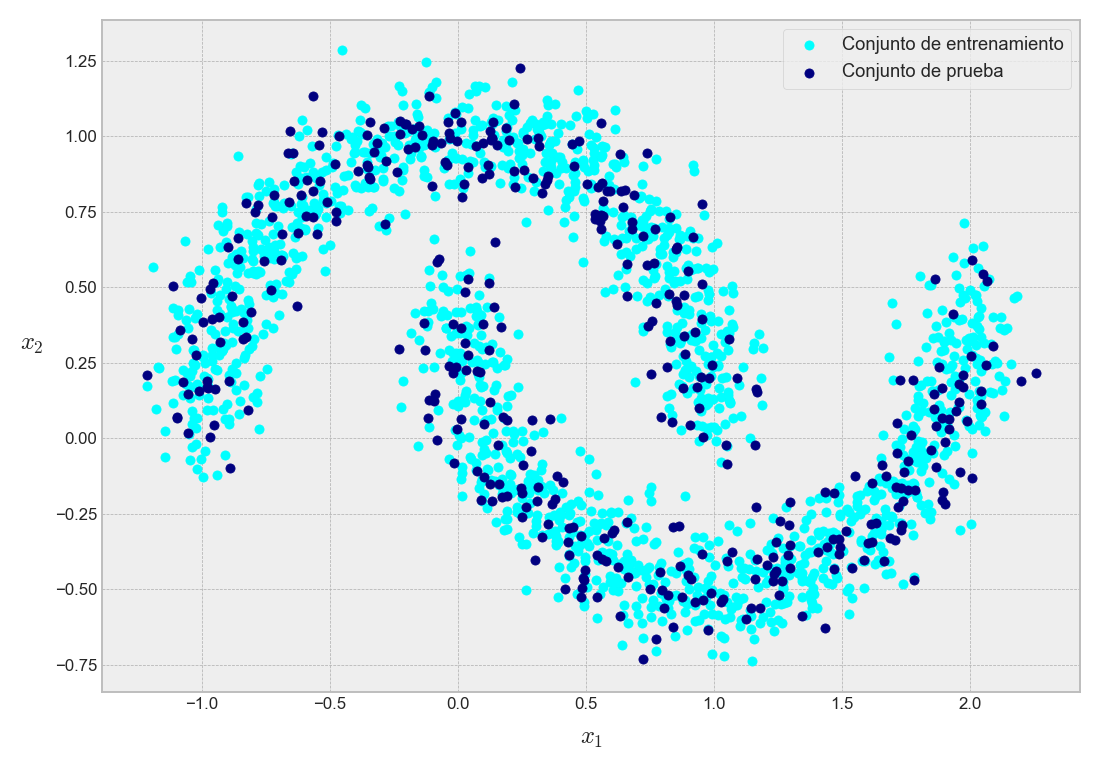

In [54]:
# Situación de los conjuntos de entrenamiento y de prueba.
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(train_set["X1"], train_set["X2"], color="cyan", marker="o", label="Conjunto de entrenamiento")
ax.scatter(test_set["X1"], test_set["X2"], color="navy", marker="o", label="Conjunto de prueba")
ax.set_xlabel(r"$x_{1}$", fontsize=16, labelpad=10)
ax.set_ylabel(r"$x_{2}$", fontsize=16, labelpad=15, rotation=0)
ax.legend(loc="best", frameon=True, fontsize=12)
plt.tight_layout();

Dada la separación anterior, vamos a entrenar nuestro modelo. En este caso, se tratará de un modelo de regresión logística binaria similar al que construimos desde cero previamente. Notemos que este primer modelo no incorporará regularización:

In [55]:
from sklearn.linear_model import SGDClassifier

In [56]:
# Instanciamos nuestro modelo.
model = SGDClassifier(
    loss="log_loss", penalty=None, max_iter=1000, learning_rate="constant", eta0=0.1, random_state=42,
)

In [57]:
# Y ahora lo entrenamos.
model.fit(X_train, y_train)

SGDClassifier(eta0=0.1, learning_rate='constant', loss='log_loss', penalty=None,
              random_state=42)

Con el modelo ya entrenado, podemos comenzar a comprobar nuestros resultados. En primer lugar, obtenemos los coeficientes de la funcion de decisión:

In [58]:
# Parámetros estimados por nuestro modelo.
w, b = model.coef_[0], model.intercept_[0]

In [59]:
# Calculamos el recorrido de la recta que representa el umbral de discriminación del modelo.
line = (-b - w[0] * data["X1"]) / w[1]

In [67]:
# Obtenemos las predicciones realizadas por el modelo.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [68]:
# Juntamos todo en una única matriz.
train_preds = np.hstack([X_train, y_train_pred.reshape(-1, 1)])
test_preds = np.hstack([X_test, y_test_pred.reshape(-1, 1)])

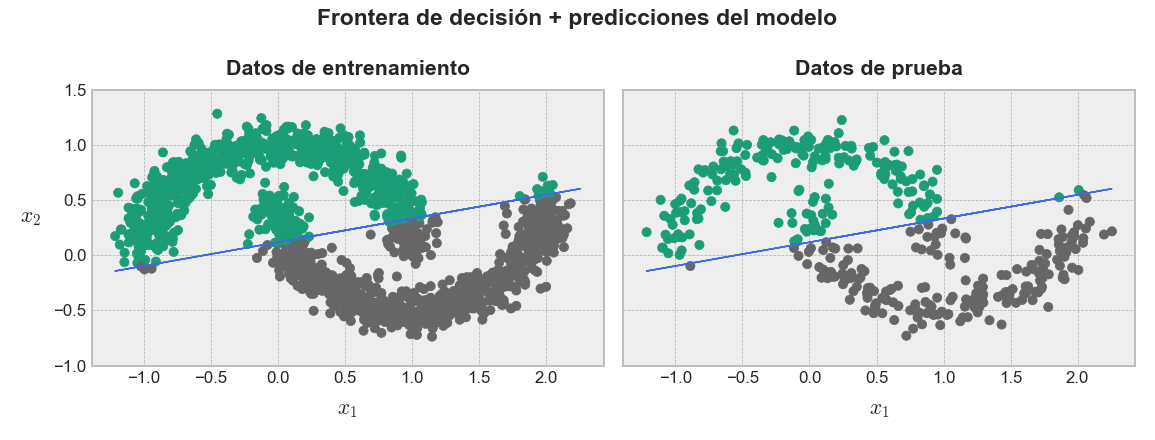

In [74]:
# Graficamos los resultados del modelo.
fig, ax = plt.subplots(figsize=(10.5, 4), ncols=2, sharey=True)

ax[0].scatter(train_preds[:, 0], train_preds[:, 1], c=train_preds[:, 2], marker="o", cmap="Dark2")
ax[0].set_xlabel(r"$x_{1}$", fontsize=14, labelpad=10)
ax[0].set_ylabel(r"$x_{2}$", fontsize=14, labelpad=15, rotation=0)
ax[0].plot(data["X1"], line, color="royalblue", lw=1.0)
ax[0].set_ylim(-1.0, 1.5)
ax[0].set_title("Datos de entrenamiento", pad=10, fontsize=14, fontweight="bold")

ax[1].scatter(test_preds[:, 0], test_preds[:, 1], c=test_preds[:, 2], marker="o", cmap="Dark2")
ax[1].set_xlabel(r"$x_{1}$", fontsize=14, labelpad=10)
ax[1].plot(data["X1"], line, color="royalblue", lw=1.0)
ax[1].set_ylim(-1.0, 1.5)
ax[1].set_title("Datos de prueba", pad=10, fontsize=14, fontweight="bold")

fig.suptitle("Frontera de decisión + predicciones del modelo", fontsize=15, fontweight="bold")
plt.tight_layout();

Podemos observar que, indudablemente, la implementación de **<font color='mediumorchid'>Scikit-Learn</font>** para el algoritmo de gradiente descendente aplicado sobre la función de entropía cruzada resulta en un modelo con un desempeño bastante mejor que el logrado por nuestra implementación casera del modelo de regresión logística binaria.

Por supuesto, el trabajo resultó ser igualmente mucho más compacto. Los hiperparámetros adicionales de la clase `SGDClassifier` podrían ajustarse para obtener una mejora (no muy significativa en este caso, dado que el conjunto de datos claramente no puede separarse por medio de una función de decisión lineal) del desempeño del modelo. Pero, por ahora, dejaremos nuestro ejemplo hasta aquí, ya que, por el momento, no hemos discutido nada acerca de las **métricas de desempeño** aplicables a los modelos de clasificación. Eso es algo que haremos a continuación. ◼︎